<a href="https://colab.research.google.com/github/CaptnClementine/Skytech_test/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Успешность прототипа
Известно что компания конкурент выпустила 1000 прототипов игр, из которых было 5 успешных. Наша компания выпустила 200 прототипов из которых ни один не был успешен.
Какова вероятность что следующий (201й) наш прототип будет успешен? Решите задачу классическим и баесовским подходами.


При применении **классического** **подхода** возможны несколько вариантов:

1) Вероятность неизвестна, так как нельзя перенести данные с одного эксперимента на другой, а своих наблюдений мало, чтоб оценить реальную частоту успешности наших игр.


2) Можно добавить псевдокаунт к числу успехов и неуспехов и сказать, что вероятность следующей игры быть успешной (0+1)/(200+1+0+1) = 1/202

3) Предположим, что все 200 раз мы не выпускали успешную игру, так как нам просто не везло, а значит это события маловероятно и находится вне 95% интервала. p-vslue = 1-0,95=0,05


Тогда (1-x)^200 = 0,05 => 1-x=0,985 => x=0,015 будет нашей самой оптимистичной оценкой и у нас будет 95% вероятность, что вероятность выпустить 201 успешный прототип от 0 до 1,5%

4) Самое сомнительное и некорректное - прямое использование частоты из прошлого эксперимента, если нет причин полагать что команда компании-конкурента сильно отличается от нашей и работа идет в таких же условиях. Тогда P=1/200


**Байесовский подход** будет использовать информацию конкурентов как априорную (то есть они считают, что знание о конкурентах нам чем-то полезно). Это бинарный исход — игра либо получилась, либо нет, поэтому смоделируем наше распределение бета-функцией.

1) Пусть мы не верим, что есть сходство между нашей командой разработки и командой разработки конкурентов. Тогда мы не знаем значение вероятностей, поэтому в качестве стартовой точки возьмем предположение об одинаковой вероятности будет на отрезке [0,1]: Beta(1,1) будет нашим априорным распределением.

После 200 наблюдений априорное распределение будет Beta(1+0,1+200)=Beta(1, 201) и  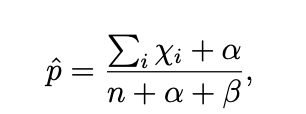, где кси - независимые случайные величины



Таким образом,

P = (0+1)/(200+1+1) или = (0+1)/(0+201+1)=1/202

2) Мы считаем что эксперимент той компании полностью моделирует наш, тогда мы можем напрямую брать данные из того эксперимента
Beta(5+0, 1000+200) = Beta(5,1200) и P = (5+0)/(1200+1+5)=5/1206 будет ожидаемой вероятностью успеха

3) Мы также можем занизить данные эксперимента компании-конкурента, чтобы наще количество данных было сопостовимо по размеру и их данные не так сильно  влияли на наши. Тогда Beta(1+0, 200+200) = Beta(1,400) и P = (1+0)/(400+1+1)=1/401

# 2 Сравнение групп платящих игроков
В мобильной игре около 10% игроков совершает платежи в первый месяц с момента установки игры (база расчета - 500 игроков).
Геймдизайнеры разработали обновление которое по их экспертной оценке должно увеличить процент плательщиков с 10% до 11%. Цель эксперимента - подтвердить или опровергнуть их гипотезу.

Опишите оптимальный по вашему мнению дизайн эксперимента
Рассчитайте длительность эксперимента при условии что каждый день в игру приходит около 100 новых игроков.
Самостоятельно сгенерируйте датасет с около 10% плательщиков (контроль) и рассчитайте 95% HDI / CI.
Сгенерируйте несколько вариантов экспериментальной группы (хуже, лучше, без эффекта), рассчитайте силу эффекта, HDI / CI и ваши выводы для каждого варианта.
Решите задачу 2 разными подходами: frequentist / bayesian

Необходимо все ответы сопроводить комментариями почему вы выбрали ту или иную методику расчета, алгоритм и т.д.


Оптимально выкатить фичу только на часть пользователей, чтобы сгладить возможное влияние других факторов при оценке почему увеличлся процент плательщиков (возможно, сейчас каникулы и школьники будут больше играть и покупаить и сами по себе, без влияния обновления)

## 1. Дизайн эксперимента
Формулировка гипотезы:

Нулевая гипотеза: Обновление не повлияет на процент плательщиков (текущий процент плательщиков 10%).

Альтернативная гипотеза: Обновление увеличит процент плательщиков до 11%.
Группы эксперимента:

Контрольная группа: Игроки, которые будут играть в игру до обновления. У них предполагаемый процент плательщиков 10%
Экспериментальная группа: Игроки, которые будут играть в игру после обновления. Предполагаемый процент плательщиков должен увеличиться до 11%
Метод:

A/B тестирование c рандомныс распределением игроков между группами с предварительным расчетом размера группы для классического подхода

Ключевая метрика: Процент плательщиков в каждой группе

Будем оценивать разницу в процентах плательщиков между группами.


Длительность эксперимента рассчитаю по стандартной формуле
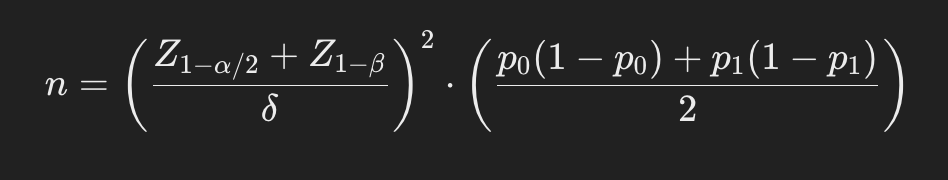


P₀ = 10% — процент плательщиков в контрольной группе,
P₁ = 11% — предполагаемый процент плательщиков в экспериментальной группе,
α = 0.05 — уровень значимости (вероятность ложного обнаружения),
β = 0.8 — мощность теста (вероятность обнаружения эффекта).


Необходимое количество игроков для каждой группы: 5278 игроков.

Поскольку у нас 100 новых игроков в день, мы можем рандомно распределить их на контрольную и экспериментальную группы. Следовательно, общее количество дней для эксперимента будет 53 дня


In [44]:
import numpy as np
import pandas as pd
import seaborn as sns

# Контрольная группа
n_control = 5300
control_data = np.random.choice([1, 0], size=n_control, p=[0.10, 0.90])

df_control = pd.DataFrame({'player_id': range(1, n_control + 1), 'is_payer': control_data})

In [45]:
# Экспериментальные группы
n_experiment = 5300

# Экспериментальная группа "без эффекта" (10% плательщиков)
experiment_data_no_effect = np.random.choice([1, 0], size=n_experiment, p=[0.10, 0.90])
df_experiment_no_effect = pd.DataFrame({'player_id': range(1, n_experiment + 1), 'is_payer': experiment_data_no_effect})

# Экспериментальная группа "хуже" (9% плательщиков)
experiment_data_worse = np.random.choice([1, 0], size=n_experiment, p=[0.09, 0.91])
df_experiment_worse = pd.DataFrame({'player_id': range(1, n_experiment + 1), 'is_payer': experiment_data_worse})

# Экспериментальная группа "лучше" (11% плательщиков)
experiment_data_better = np.random.choice([1, 0], size=n_experiment, p=[0.11, 0.89])
df_experiment_better = pd.DataFrame({'player_id': range(1, n_experiment + 1), 'is_payer': experiment_data_better})

Классический подход и z-test

In [46]:
from scipy import stats

success_control = df_control['is_payer'].sum()
n_control = len(df_control)

success_experiment_no_effect = df_experiment_no_effect['is_payer'].sum()
success_experiment_worse = df_experiment_worse['is_payer'].sum()
success_experiment_better = df_experiment_better['is_payer'].sum()

n_experiment = len(df_experiment_no_effect)

# Z-test для процентных данных
def z_test(success_a, n_a, success_b, n_b):
    p_a = success_a / n_a
    p_b = success_b / n_b
    p_combined = (success_a + success_b) / (n_a + n_b)
    se_combined = np.sqrt(p_combined * (1 - p_combined) * (1 / n_a + 1 / n_b))
    z_score = (p_a - p_b) / se_combined
    p_value = stats.norm.sf(abs(z_score)) * 2  # Two-tailed p-value
    return z_score, p_value

z_score_no_effect, p_value_no_effect = z_test(success_control, n_control, success_experiment_no_effect, n_experiment)
z_score_worse, p_value_worse = z_test(success_control, n_control, success_experiment_worse, n_experiment)
z_score_better, p_value_better = z_test(success_control, n_control, success_experiment_better, n_experiment)

print("P-value для группы 'без эффекта':", p_value_no_effect)
print("P-value для группы 'хуже':", p_value_worse)
print("P-value для группы 'лучше':", p_value_better)


P-value для группы 'без эффекта': 1.0
P-value для группы 'хуже': 0.09799337373099012
P-value для группы 'лучше': 0.6316019860593172


Видим, что при рассчитаном размере выборки (5300) эффект не имеет значимых различий для группы "лучше", а в завичимости от порого - есть или нет эффект и для группы "хуже". При увеличиении выборки до 10000 мы видим наличие явного разлчия и в группе "хуже", и в группе "лучше"

Баесовский подход

In [48]:
import matplotlib.pyplot as plt
import scipy.stats as ss

# Апостериорное распределение Beta
alpha_prior, beta_prior = 1, 1  # Неинформативное априорное распределение

alpha_posterior = alpha_prior + success_control
beta_posterior = beta_prior + n_control - success_control

In [47]:
# HDI для контрольной группы
hdi_lower = stats.beta(alpha_posterior, beta_posterior).ppf(0.025)
hdi_upper = stats.beta(alpha_posterior, beta_posterior).ppf(0.975)

print(f"У контрольной группы 95% HDI: [{hdi_lower:.3f}, {hdi_upper:.3f}]")


У контрольной группы 95% HDI: [0.094, 0.106]


In [49]:
alpha_posterior_worse = alpha_prior + success_experiment_worse
beta_posterior_worse = beta_prior + n_control - success_experiment_worse

hdi_lower = stats.beta(alpha_posterior_worse, beta_posterior_worse).ppf(0.025)
hdi_upper = stats.beta(alpha_posterior_worse, beta_posterior_worse).ppf(0.975)

print(f"У группы 'хуже' 95% HDI: [{hdi_lower:.3f}, {hdi_upper:.3f}]")

У группы 'хуже' 95% HDI: [0.087, 0.103]


In [50]:
alpha_posterior_better = alpha_prior + success_experiment_better
beta_posterior_better = beta_prior + n_control - success_experiment_better

hdi_lower = stats.beta(alpha_posterior_better, beta_posterior_better).ppf(0.025)
hdi_upper = stats.beta(alpha_posterior_better, beta_posterior_better).ppf(0.975)

print(f"У группы 'лучше' 95% HDI: [{hdi_lower:.3f}, {hdi_upper:.3f}]")

У группы 'лучше' 95% HDI: [0.094, 0.110]


В баесовском подходе видно, что при размере выборки 5300 HDI пересекаются, но плюс баесовского подхода в том, что мы не обязаны на этом моменте завершать эксперименти и видя то, что границы могу разойтись можем принять решения продолжить эксперимент и накопить большее количество данных (для 10000 человек в каждой группе интервалы уже разойдутся)

# 3 Предсказание оттока
В мобильной игре, после установки и запуска игры начинается туториал - игрок проходит обучение игре, которое состоит из нескольких последовательных шагов.
Данные представляют собой набор строк - уникальный id игрока, datetime и номер шага туториала который пройден игроком.
Геймдизайнеры выдвинули гипотезу - если мы с высокой вероятностью сможем предсказать шаг на котором игрок уйдет из игры заранее, то запустив альтернативное продолжение туториала с этого шага мы избежим оттока и увеличим прохождение туториала.
Как бы вы решали задачу предсказания отвала игрока?
Как оценить качество полученной модели? Опишите методы которые знаете и какой считаете оптимальным и почему.
Предположим что вы разработали модель которая с достаточной вероятностью предсказывает отвал. Опишите дизайн эксперимента и методологию по проверке гипотезы геймдизайнеров


1) Как бы вы решали задачу предсказания отвала игрока?

 Посмотрела бы статистику по всем игрокам и нашла **топ** уровней, на которых отвливаются игроки. Если бы один из уровней на порядок отличлася по отвалу игроков - выбрала бы для изменения его. Если бы у нескольких уровней были похожие показатели, то в зависимости от увеличения стомости разработки с уменьшением уровня действовала бы по-разному. Если стоимость разработки нескольких уровней не сильно выше, то взяла бы самый маленький, чтобы больше игроков прошли дальше и можно было сравнить их поведение на следующих уровнях в альтернативном туториале. Если же стоимость разработки велика, то взяла бы сперва самый большой уровень, для проверки гипотезы и затем дорабатывала альтерантивный путь от больщего уровня к меньшему из **топа**

При запросе прибавляю один, так как считаю, что если он прошел 6ой шаг, то это попало в таблицу, а данные о непройденном уровне не записываются (то есть 7ой он не прошел).

In [ ]:
LAST_STEP = 42 # предположим 42 - последний уровень туториала

table1 =
'''SELECT
    id,
    MAX(tutorial_step)+1 as max_tutorial_step
FROM
    player_data
GROUP BY
    id
HAVING
    MAX(tutorial_step) < LAST_STEP;
'''

table2 =
'''SELECT
    max_tutorial_step,
    COUNT(id) as count_users
FROM
    table1
GROUP BY
    max_tutorial_step
ORDER BY
    count_users DESC;
'''

Также можно построить график выживаемости, на котором хорошо будут видны провалы на тех уровнях, где больше всего уход игроков OY - уровни, OX - количество оставшихся игроков)

Пример графика: 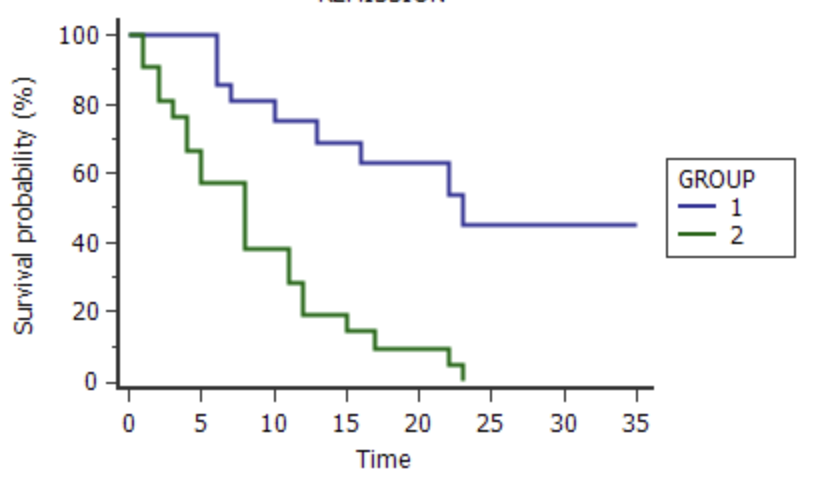

Итак, я получила уровень на котором застревает большая часть юзеров. Пусть это был уровень 37

Затем я бы собрала уникальные характеристики игроков на этом уровне, в перечисленных характеристиках у нас есть время прохождения каждого уровня этим игроком. Возможно такие юзеры застревают на каких-то определенных уровнях до этого или в целом дольше доходят до этого шага. Также можно учесть и среднее время перехода с одног шага на другой, чтобы не было ложноположительных вариантов, когда юзер просто не успел приступить к следующему шагу

In [ ]:
users_out = '''SELECT
    id
FROM
    player_data
GROUP BY
    id
HAVING
    MAX(tutorial_step) = 37;
'''

users_stay = '''SELECT
    id
FROM
    player_data
GROUP BY
    id
HAVING
    MAX(tutorial_step) > 37;
'''

Для этого я построю графики у таблиц users_out и users_stay (распределения, боксплоты), соберу статистики по уровням до отваливающегося и найду ключевые характеристики. На этом этапе желательно бы иметь и общую информацию о юзерах (пол, возраст, страна) - чтобы также использовать это в качестве фичи для предсказания.

Это типичная модель бинарной классификации - то есть предсказания отваливается этот человек на этом уровне или нет, так что можно сравнить простой отбор юзеров по фичам с моделями для классификации и посмотреть какой подход даст лучшие результаты. Стоит учесть, что классификаторы поддерживать будет сложнее, чем использование простого статистического метода **(например наивный баес)**, который вполне может оказаться достаточным. Для модели и статистического метода можно также отобрать юзеров и сравнить кривые выживания юзеров и если они практически одинаковые, то выбрать наименее затратный вариант расчета.

Первым делом я рассчитаю минимальный размер выборки и длительность эксперимента на основе значимого для нас эффекта. 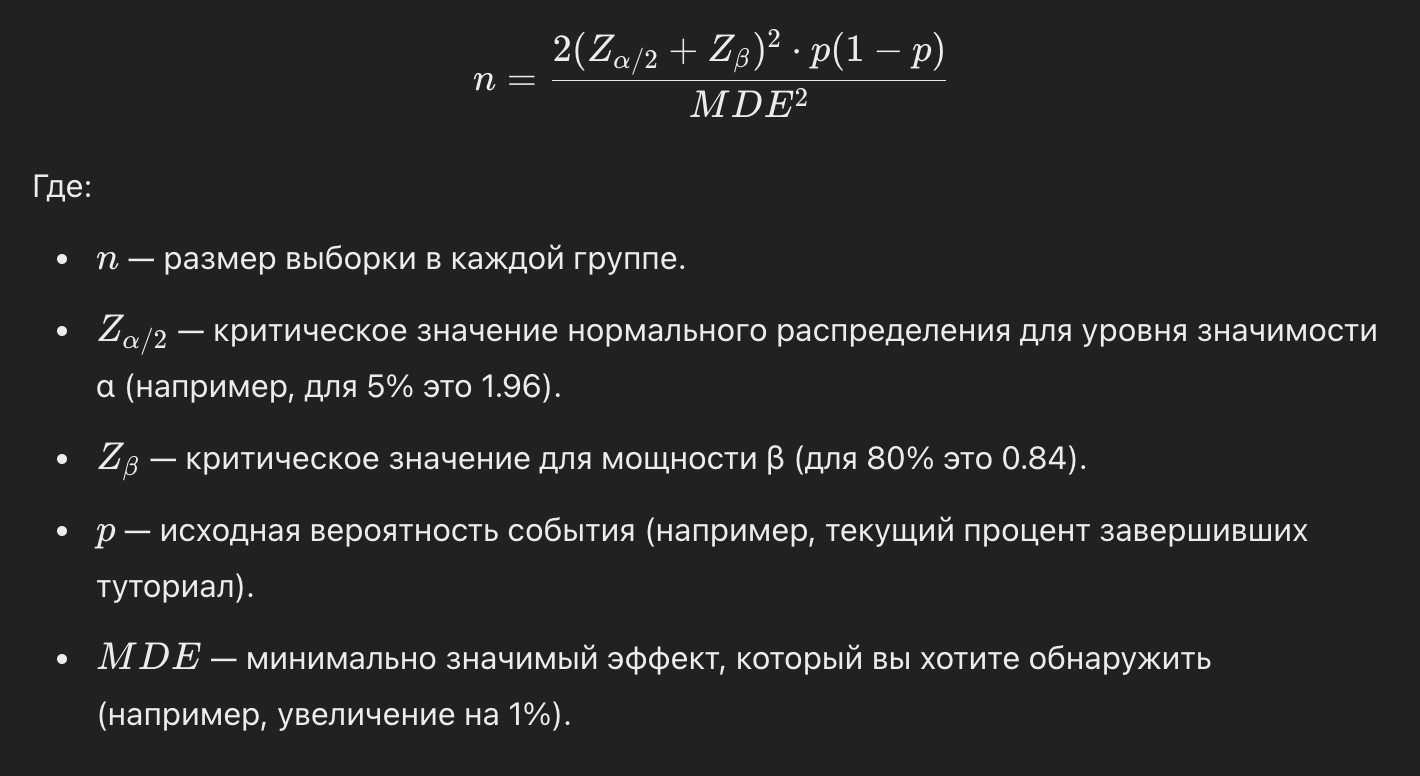 Затем для предсказываемых игроков (тех, что должны выпасть при прохождении оригинального туториала на 37ом уровне) стоит рандомно их поделить на две группы и затем сравнить улучшилось ли в группе с измененным туториалом его прохождение (тут также используем AB тесты, строим кривые выживания). Нашей нулевой гипотезой будет то, что альтернативное продолжение туториала не влияет на снижение оттока игроков. Ключевой метрикой может быть либо процент завершивших туториал, либо процент перешедших этот 37ой уровень игроков. В зависимости от данных я буду использовать либо Т-критерий Стьюдента, либо тест Шапиро-Уилка, либо U-критерий Манна-Уитни. Также можно использовать баесовский подход



PS также можно использовать модель регрессии, если нам надо предсказать для каждого юзера конкретный шаг, на котором он отвалится

# 4 Эффективность рекламных кампаний
Отдел маркетинга оперирует некоторым множеством рекламных кампаний. Первая часть оперирования состоит из запуска тестовых рекламных кампаний, у которых есть требования по KPI при достижении которых тест считается успешным.
Успешные тесты переходят в разряд постоянных кампаний и вторая часть оперирования состоит из мониторинга постоянных кампаний - управление бюджетом кампании (COST) и мониторинг ее доходов (REVENUE), а так же соотношением доходов к расходам.
Главный KPI для постоянных рекламных кампаний - ROAS на 60й день, т.е. какой процент от расходов кампания возвращает на 60й день.
Для выполнения задачи необходимо использовать тестовый датасет (2 таблицы по расходам и доходам).
Отдел маркетинга руководствуется гипотезой - чем больший COST расходуется на кампанию тем ниже ROAS 60го дня (рост CPI при увеличении объёма закупки при сохранении того же LTV 60го дня). На основании данных подтвердите или опровергните эту гипотезу. Исходите из того что мы точно знаем что CPI зависит от объема нелинейно, вопрос в том как эту зависимость описать и учесть во 2м вопросе.
По каждой рекламной кампании рассчитайте суточный рекламный бюджет который максимизирует абсолютную маркетинговую прибыль рекламной кампании (REVENUE 60 дня минус COST).
Исходя из пункта 2 по каждой рекламной кампании дайте ваше заключение о том насколько нужно увеличить / уменьшить ее суточный бюджет либо вообще остановить.
Решите проблему рекламных кампаний по которым еще нет полных 60 дней. Объясните почему ваше решение оптимально


In [1]:
#установка нужных библиотек при работе в гугл коллаб
# !pip install google-colab -q

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np
import sys

In [4]:
# file_path = '/content/drive/MyDrive/тестовые/skytek'
file_path = './data'
sys.path.append(file_path)

In [5]:
files = os.listdir(file_path)
files

['testcase.db',
 'Тестовое задание DA.docx',
 'test.ipynb',
 'my_awesome_eda_new.py',
 '__pycache__']

In [6]:
db_path = file_path+'/testcase.db'

conn = sqlite3.connect(db_path)

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Таблицы в базе данных:", tables)


Таблицы в базе данных: [('source_comparison',), ('costs',), ('revenue',)]


In [7]:
costs = pd.read_sql_query("SELECT * FROM costs;", conn)
revenue = pd.read_sql_query("SELECT * FROM revenue;", conn)

conn.close()

print(f'Costs table\n{costs.head()}\n\n')
print(f'Revenue table\n{revenue.head()}')


Costs table
  Install_Dates  campaign_id Country  installs  spends
0    2020-04-14        90570      CZ      35.0   19.79
1    2020-04-28        90619      AT       5.0    4.99
2    2020-05-10       794235      PK      79.0    0.40
3    2020-05-07        91872      FR      12.0    9.56
4    2020-04-03        19115      JP       6.0    3.39


Revenue table
  Install_Dates  campaign_id Country     1d_LTV     3d_LTV     7d_LTV  \
0    2020-04-14        90570      CZ   7.721194   8.104811  10.209480   
1    2020-03-30        90262      CA   1.424363   1.724738   1.724738   
2    2020-04-02        19115      PL  26.912006  32.943050  66.787497   
3    2020-04-15       788948      MD   0.000000   0.000000   0.000000   
4    2020-03-26       158583      DE   0.349793   0.349793   0.349793   

     14d_LTV    30d_LTV    60d_LTV  
0  11.845200  15.349594  15.768420  
1   1.724738   1.724738   1.999413  
2  70.071922  71.644023  72.057026  
3   0.000000   0.000000   0.000000  
4   0.349793   0.3

In [8]:
from my_awesome_eda_new import run_eda
%load_ext autoreload
%autoreload 2

In [9]:
# costs['installs'] = pd.to_numeric(costs['installs'], errors='coerce')
# costs['Install_Dates'] = pd.to_datetime(costs['Install_Dates'])
# revenue['Install_Dates'] = pd.to_datetime(revenue['Install_Dates'])

# costs['campaign_id'] = costs['campaign_id'].astype(str)
# revenue['campaign_id'] = revenue['campaign_id'].astype(str)

# costs['Country'] = costs['Country'].astype(str)
# revenue['Country'] = revenue['Country'].astype(str)

Hi! I will give you some basic summary of your  dataset. 
   Shape: 9934 rows x 5 columns 


***** Data Types in Columns *****
Install_Dates    category
campaign_id         int64
Country            object
installs          float64
spends            float64




***** Main Statistics on Categorical Columns ***** 
               counts  frequencies
Install_Dates      61     0.006141

***** Descriptive Statistics for Numerical Columns *****
                    min        max           mean            std     median  \
campaign_id  19115.0000  804309.00  412902.486914  359423.488036  160845.00   
installs         0.0000    5303.00      66.930340     247.078031       9.00   
spends           0.0042     795.28      16.546832      47.911051       1.89   

                  25%        50%          75%  
campaign_id  90619.00  160845.00  791156.0000  
installs         2.00       9.00      37.0000  
spends           0.26       1.89      14.5275  


***** Main Dataframe Purity Info *****

Column c

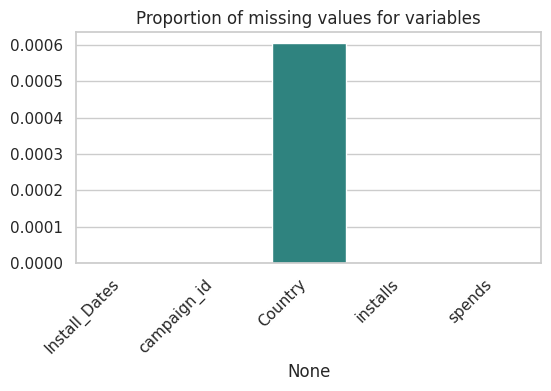

Quantity of  rows with missing values: 6
Columns with missing values: ['Country']
Duplicate rows in df: 2


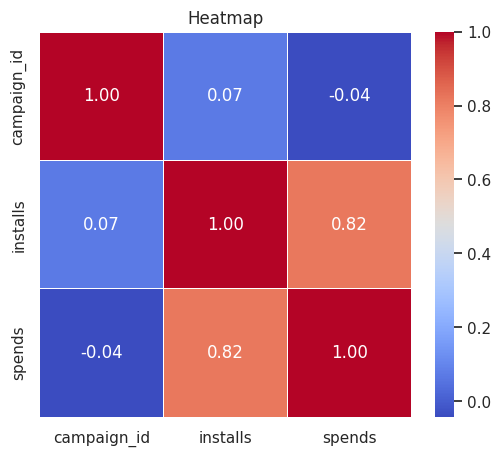

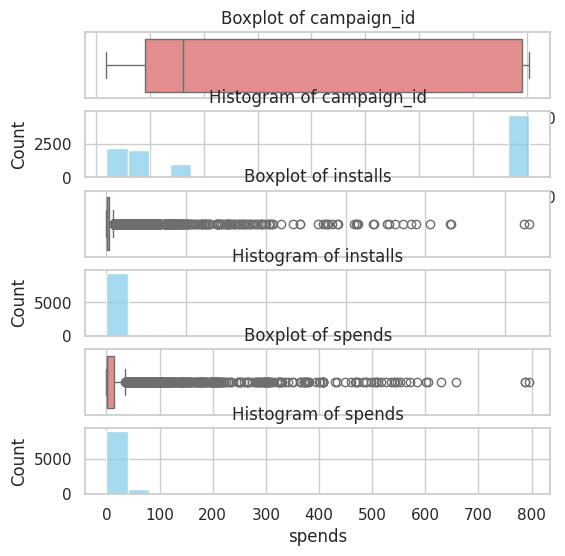

In [10]:
run_eda(costs)

Теперь посмотрим вторую таблицу

Hi! I will give you some basic summary of your  dataset. 
   Shape: 9934 rows x 9 columns 


***** Data Types in Columns *****
Install_Dates    category
campaign_id         int64
Country            object
1d_LTV            float64
3d_LTV            float64
7d_LTV            float64
14d_LTV           float64
30d_LTV           float64
60d_LTV           float64




***** Main Statistics on Categorical Columns ***** 
               counts  frequencies
Install_Dates      61     0.006141

***** Descriptive Statistics for Numerical Columns *****
                 min            max           mean            std  \
campaign_id  19115.0  804309.000000  412902.486914  359423.488036   
1d_LTV           0.0     379.083703       8.569189      25.690230   
3d_LTV           0.0     430.756317       9.720828      29.139681   
7d_LTV           0.0     627.453775      12.689585      38.219044   
14d_LTV          0.0     721.127415      15.260142      45.992289   
30d_LTV          0.0     850.287353      

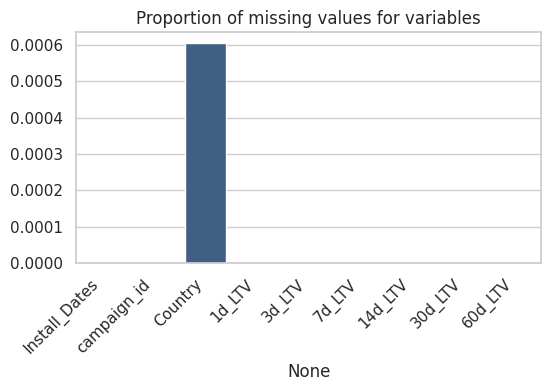

Quantity of  rows with missing values: 6
Columns with missing values: ['Country']
Duplicate rows in df: 5


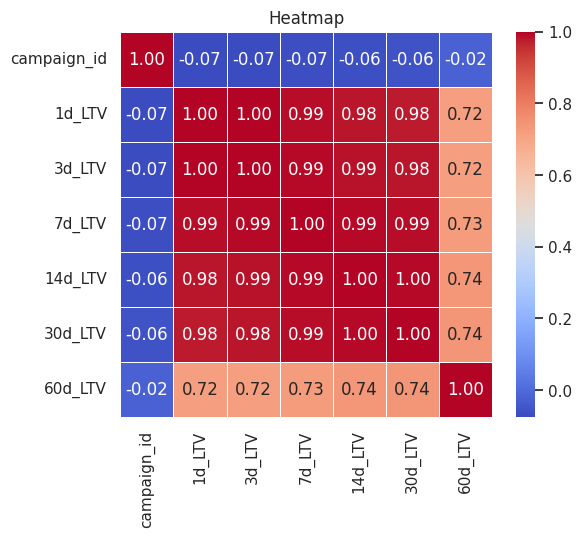

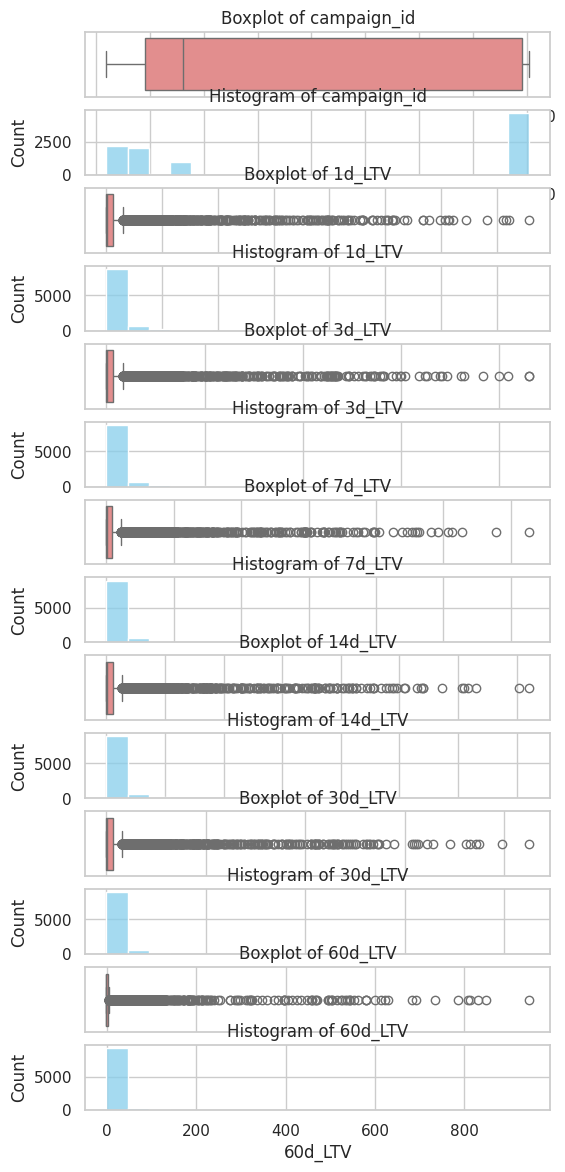

In [11]:
run_eda(revenue)

Проверю дубликаты в данных, обнаруженные скриптом, а затем удалю их

In [8]:
duplicates_count = costs.groupby(list(costs.columns)).size().reset_index(name='count')

duplicates_count[duplicates_count['count'] > 1]

,Install_Dates,campaign_id,Country,installs,spends,count
6784,2020-04-30,794235,CR,2.0,0.01,2
6822,2020-04-30,794235,TN,15.0,0.08,2


In [9]:
costs = costs.drop_duplicates()

In [10]:
duplicates_count = revenue.groupby(list(revenue.columns)).size().reset_index(name='count')
duplicates_count[duplicates_count['count'] > 1]

,Install_Dates,campaign_id,Country,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,count
6580,2020-04-30,22083,JP,0.0,0.0,0.0,0.0,0.0,-1.0,2
6588,2020-04-30,22083,TW,0.0,0.0,0.0,0.0,0.0,-1.0,2
6592,2020-04-30,22083,UNKNOWN,0.0,0.0,0.0,0.0,0.0,-1.0,2
6639,2020-04-30,94033,UN,0.0,0.0,0.0,0.0,0.0,-1.0,2
6704,2020-04-30,788248,IN,0.0,0.0,0.0,0.0,0.0,-1.0,2


In [11]:
revenue = revenue.drop_duplicates()

Теперь можно объединить данные и посчитать ROAS. При объединении важно учитывать и дату, и айди, и страну



In [12]:
merged_data = pd.merge(costs, revenue, on=['Install_Dates', 'campaign_id', 'Country'], how='inner')

merged_data

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60
0,2020-04-14,90570,CZ,35.0,19.79,7.721194,8.104811,10.209480,11.845200,15.349594,15.768420,0.796787
1,2020-04-28,90619,AT,5.0,4.99,1.032342,1.032342,1.248888,1.501317,1.761729,-1.000000,-0.200401
2,2020-05-10,794235,PK,79.0,0.40,0.212500,0.254620,0.390186,0.519535,0.652006,-1.000000,-2.500000
3,2020-05-07,91872,FR,12.0,9.56,4.661390,4.787784,6.422362,6.596973,6.596973,-1.000000,-0.104603
4,2020-04-03,19115,JP,6.0,3.39,0.833442,0.833442,1.103046,1.167516,1.398647,1.416652,0.417891
...,...,...,...,...,...,...,...,...,...,...,...,...
10187,2020-04-02,90464,UN,0.0,0.45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10188,2020-04-27,19115,DE,27.0,21.33,31.003103,36.859179,45.552113,52.804398,58.205993,-1.000000,-0.046882
10189,2020-03-27,159253,DK,2.0,0.19,0.351962,0.351962,0.386234,0.448579,0.564261,0.693104,3.647916
10190,2020-04-12,790034,RU,534.0,81.06,47.323662,56.483875,65.396237,75.178386,85.603100,92.690140,1.143476


In [13]:
merged_data.describe()

,campaign_id,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60
count,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000
mean,412465.303277,67.330651,16.673078,8.636730,9.807565,12.804687,15.391697,17.919346,9.553744,-6.597759
std,359456.156697,247.030329,48.147120,25.781883,29.286257,38.402374,46.205699,54.090900,46.321479,21.831019
min,19115.000000,0.000000,0.004200,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-100.000000
25%,90619.000000,2.000000,0.260000,0.053717,0.057611,0.070411,0.079699,0.086345,-1.000000,-1.000000
50%,160845.000000,9.000000,1.910000,0.706935,0.796823,1.008331,1.203781,1.356477,-1.000000,-0.023750
75%,791179.000000,37.000000,14.732500,6.139350,6.952832,9.041440,10.956005,12.648856,1.424367,0.724511
max,804309.000000,5303.000000,795.280000,379.083703,430.756317,627.453775,721.127415,850.287353,945.104897,195.605600


Подозрительно много данных =-1 у 60d_LTV, при этом у других колонок LTV их нет. Как они решают будет ли LTV 60 -1 или нет?

In [17]:
merged_data[merged_data['30d_LTV']<0]

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60


In [18]:
merged_data[merged_data['1d_LTV']<0]

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60


In [19]:
(merged_data[merged_data['60d_LTV']<0]==merged_data[merged_data['60d_LTV']==-1])['60d_LTV'].all()

True

In [20]:
(merged_data[merged_data['60d_LTV']<0]==merged_data[merged_data['60d_LTV']==-1])['60d_LTV'].count()

5614

То есть у 5614 значений - более чем половины от всех данных LTV на 60 день становится равен -1. В предыдущих данных по LTV нет отрицательных значений

Самое логично, что могло бы привести к отрицательному LTV это маленькое количество установок или их отсутсвие. Однако из таблицы выше видно, что это не единственный случай, когда LTV = -1. Взгляну на три примера:


1.   **Нет установок, но есть затраты**



In [26]:
merged_data[merged_data['60d_LTV']>=0].sort_values(by=['installs', 'spends'], ascending=[True, False])[:15]

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60
9240,2020-03-29,789602,RU,0.0,507.4631,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8636,2020-03-30,789602,RU,0.0,488.0374,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,2020-03-28,789602,RU,0.0,469.8013,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1080,2020-04-01,789602,RU,0.0,433.8622,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6497,2020-03-23,789602,RU,0.0,408.2026,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8144,2020-03-24,789602,RU,0.0,407.6828,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3838,2020-03-22,789602,RU,0.0,371.9956,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10037,2020-03-27,789602,RU,0.0,206.7478,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3240,2020-03-21,789602,RU,0.0,205.3011,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2505,2020-03-26,789602,RU,0.0,201.3689,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Сколько компаний привело к 0 установок?

In [15]:
merged_data[merged_data['installs']==0]['Country'].count()

718

Посмотрю внимательнее чем отличаются

In [23]:
merged_data.loc[9240]

,9240
Install_Dates,2020-03-29
campaign_id,789602
Country,RU
installs,0.0
spends,507.4631
1d_LTV,0.0
3d_LTV,0.0
7d_LTV,0.0
14d_LTV,0.0
30d_LTV,0.0


2.   **Есть установки, но LTV 60 = -1**

In [27]:
merged_data[merged_data['60d_LTV']<0].sort_values('installs', ascending=False)

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60
6374,2020-04-24,160845,RU,2908.0,546.93,310.763468,364.443180,460.302444,536.694354,626.042236,-1.0,-0.001828
925,2020-04-30,160845,RU,2826.0,563.10,303.901900,347.040066,463.332762,540.065457,623.359928,-1.0,-0.001776
926,2020-04-30,160845,RU,2826.0,563.10,92.179808,122.274622,155.946611,186.521125,222.081502,-1.0,-0.001776
9727,2020-05-12,160845,RU,2785.0,552.75,283.924534,318.788078,404.303154,490.887786,657.234007,-1.0,-0.001809
4947,2020-05-05,160845,RU,2748.0,601.53,306.477343,341.494236,425.676133,509.517028,613.955726,-1.0,-0.001662
...,...,...,...,...,...,...,...,...,...,...,...,...
4573,2020-05-17,22083,UK,0.0,6.25,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-0.160000
1850,2020-04-20,793773,MM,0.0,0.09,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-11.111111
9430,2020-04-21,792342,UZ,0.0,0.06,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-16.666667
1843,2020-04-19,793773,BF,0.0,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-100.000000


In [24]:
merged_data.loc[6374]

,6374
Install_Dates,2020-04-24
campaign_id,160845
Country,RU
installs,2908.0
spends,546.93
1d_LTV,310.763468
3d_LTV,364.44318
7d_LTV,460.302444
14d_LTV,536.694354
30d_LTV,626.042236


3.   **Есть установки, LTV 60 > 0**

In [29]:
merged_data[merged_data['60d_LTV']>0].sort_values('installs', ascending=False)

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60
6430,2020-04-08,790034,RU,5303.0,787.60,249.713496,281.696888,366.206067,434.484466,515.187462,579.578697,0.735880
5742,2020-04-07,790034,RU,5242.0,787.77,238.830389,268.822636,346.122207,413.922822,474.653503,524.456802,0.665749
5250,2020-04-05,790034,RU,4319.0,658.41,269.651269,299.022518,458.588390,530.713470,619.210553,684.010551,1.038882
3307,2020-04-06,790034,RU,4305.0,795.28,357.985504,409.741398,577.786707,721.127415,850.287353,945.104897,1.188393
2832,2020-04-04,790034,RU,4065.0,571.44,207.815060,234.237382,312.023663,402.672877,475.503447,537.003548,0.939737
...,...,...,...,...,...,...,...,...,...,...,...,...
1278,2020-04-05,93546,NL,1.0,0.71,0.030402,0.030402,0.030402,0.030402,0.030402,0.030402,0.042820
1277,2020-04-12,788454,JP,1.0,0.24,0.040060,0.040060,0.040060,0.040060,0.040060,0.040060,0.166917
7589,2020-04-09,788982,MX,1.0,0.03,0.000000,0.000000,0.017656,0.017656,0.017656,0.017656,0.588533
7636,2020-03-21,158780,IE,1.0,0.20,0.022600,0.022600,0.022600,0.022600,0.022600,0.022600,0.113000


Видим, что даже при одной установке и не больших LTV до 60го дня LTV60 может быть слегка положительным

Построю графики, чтобы лучше понять как влияют признаки на LTV 60 (больше, равно и меньше 0)

In [31]:
def group_ltv(value):
    if value > 0:
        return '60d_LTV > 0'
    elif value == 0:
        return '60d_LTV = 0'
    else:
        return '60d_LTV < 0'

merged_data['LTV_Group'] = merged_data['60d_LTV'].apply(group_ltv)

print(merged_data['LTV_Group'].value_counts())

LTV_Group
60d_LTV < 0    5614
60d_LTV > 0    4035
60d_LTV = 0     543
Name: count, dtype: int64


In [37]:
# Средние значения и дисперсия для каждой группы
grouped = merged_data.groupby('LTV_Group').agg({
    'installs': ['mean', 'var'],  # Среднее и дисперсия для installs
    'spends': ['mean', 'var'],     # Среднее и дисперсия для spends
    '60d_LTV': ['mean', 'var']     # Среднее и дисперсия для 60d_LTV
}).reset_index()

# Переименование столбцов для удобства
grouped.columns = ['LTV_Group', 'Mean_Installs', 'Var_Installs', 'Mean_Spends', 'Var_Spends', 'Mean_60d_LTV', 'Var_60d_LTV']

grouped


,LTV_Group,Mean_Installs,Var_Installs,Mean_Spends,Var_Spends,Mean_60d_LTV,Var_60d_LTV
0,60d_LTV < 0,57.691664,36257.219895,15.217522,1818.139807,-1.000000,0.0000
1,60d_LTV = 0,0.523020,1.722255,9.320937,2985.371863,0.000000,0.0000
2,60d_LTV > 0,89.732094,102482.076201,19.687627,2906.052084,25.523111,4998.2035


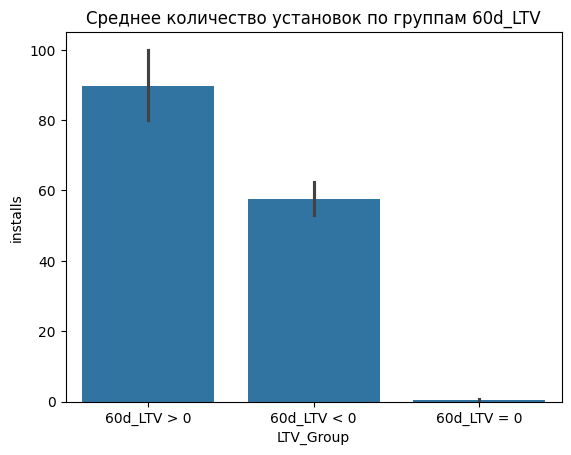

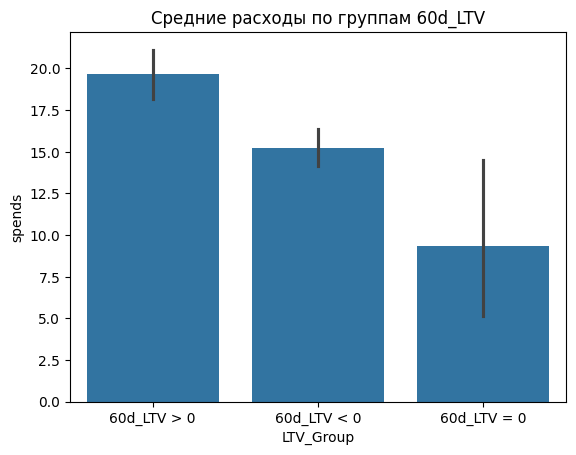

In [39]:


# Визуализация средних значений installs для каждой группы
sns.barplot(x='LTV_Group', y='installs', data=merged_data)
plt.title('Среднее количество установок по группам 60d_LTV')
plt.show()

# Визуализация средних значений spends для каждой группы
sns.barplot(x='LTV_Group', y='spends', data=merged_data)
plt.title('Средние расходы по группам 60d_LTV')
plt.show()


In [45]:
sns.set(style="whitegrid")

# Функция для построения графиков распределения
def plot_distribution(column, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=merged_data, x=column, hue='LTV_Group', multiple='stack', kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Частота')
    # plt.legend(title='Группы')
    plt.grid(True)
    plt.show()

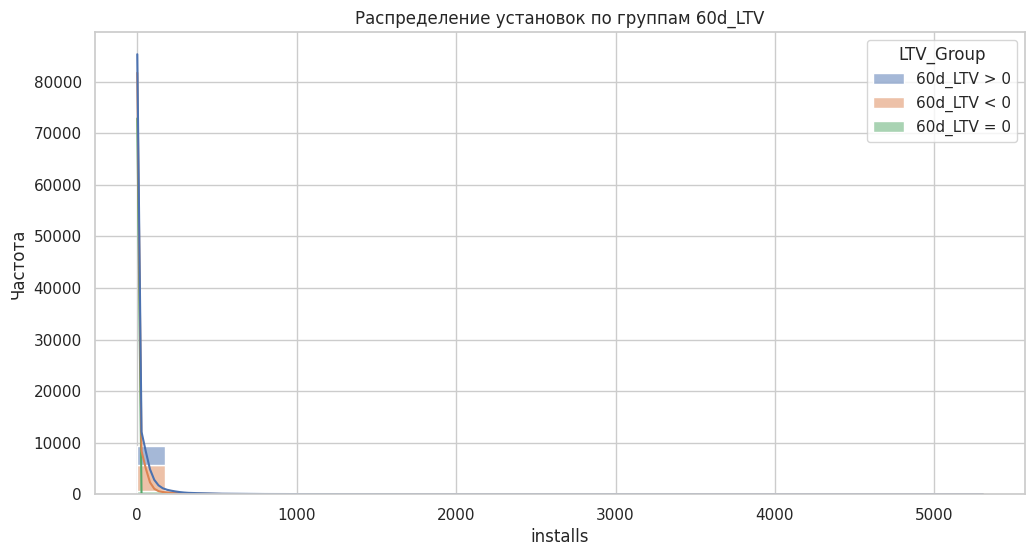

In [46]:
# Построение графиков распределения для installs, spends и 60d_LTV
plot_distribution('installs', 'Распределение установок по группам 60d_LTV')

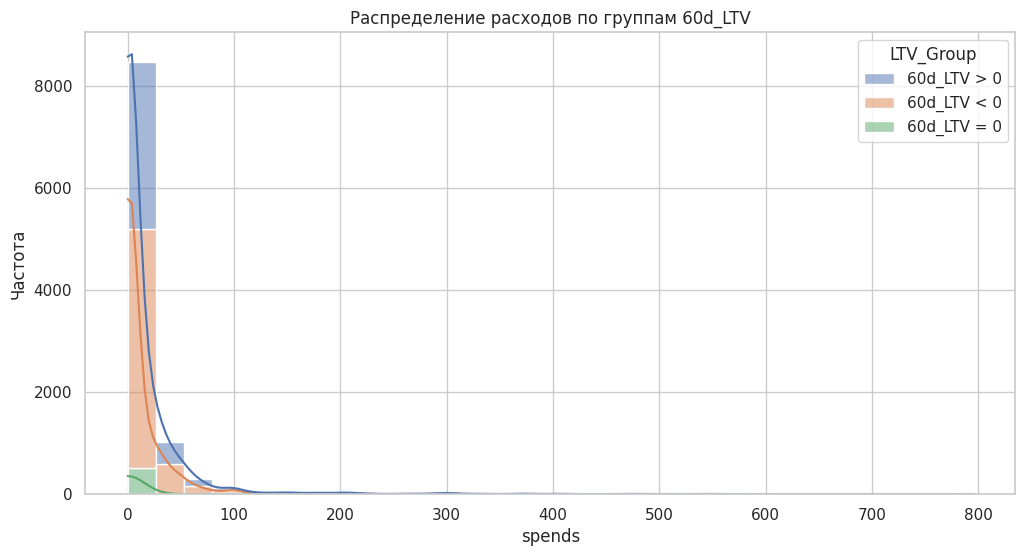

In [47]:
plot_distribution('spends', 'Распределение расходов по группам 60d_LTV')

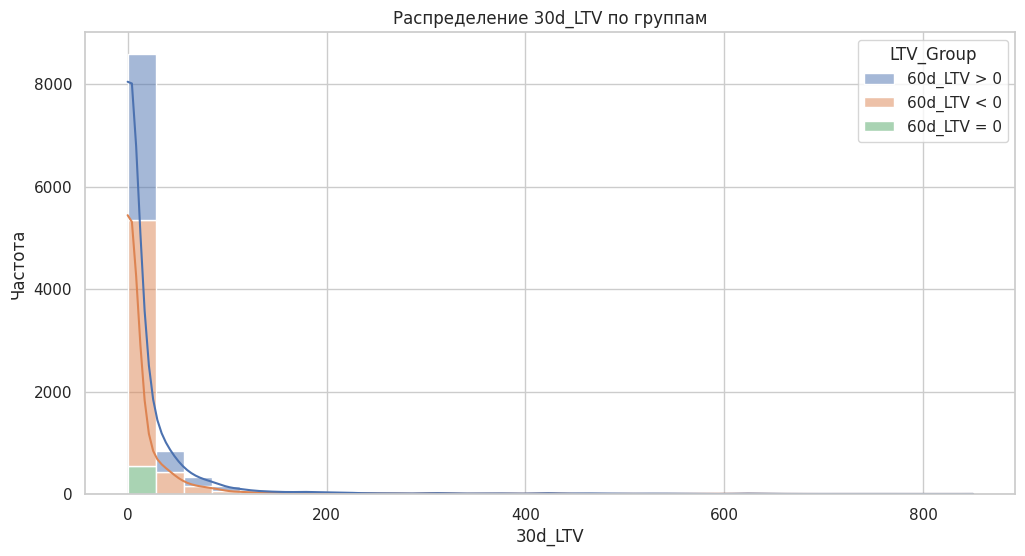

In [48]:
plot_distribution('30d_LTV', 'Распределение 30d_LTV по группам')

Судя по всему, данные с LTV=-1 означают, что там еще не прошло полных 60 дней. Посмотрим как можно восстановить и спрогнозировтаь эту метрик

In [52]:
# Рассчитываем корреляцию между 30d_LTV и 60d_LTV
merged_data_positive_60ltv = merged_data[merged_data['60d_LTV']>=0]
correlation = merged_data_positive_60ltv['30d_LTV'].corr(merged_data_positive_60ltv['60d_LTV'])

# Выводим результат
print(f"Корреляция между 30d_LTV и 60d_LTV: {correlation}")

Корреляция между 30d_LTV и 60d_LTV: 0.9970395439512321


Есть линейная сильная корреляция между значениями

In [75]:
merged_data_positive_60ltv = merged_data_positive_60ltv[merged_data_positive_60ltv['30d_LTV']>0]
(merged_data_positive_60ltv['60d_LTV']/merged_data_positive_60ltv['30d_LTV']).dropna().describe()

,0
count,4026.000000
mean,1.115886
std,1.142003
min,1.000000
25%,1.000000
50%,1.023449
75%,1.096407
max,70.833555


In [87]:
ratio=(merged_data_positive_60ltv['60d_LTV']/merged_data_positive_60ltv['30d_LTV']).dropna()
ratio.describe()

,0
count,4026.000000
mean,1.115886
std,1.142003
min,1.000000
25%,1.000000
50%,1.023449
75%,1.096407
max,70.833555


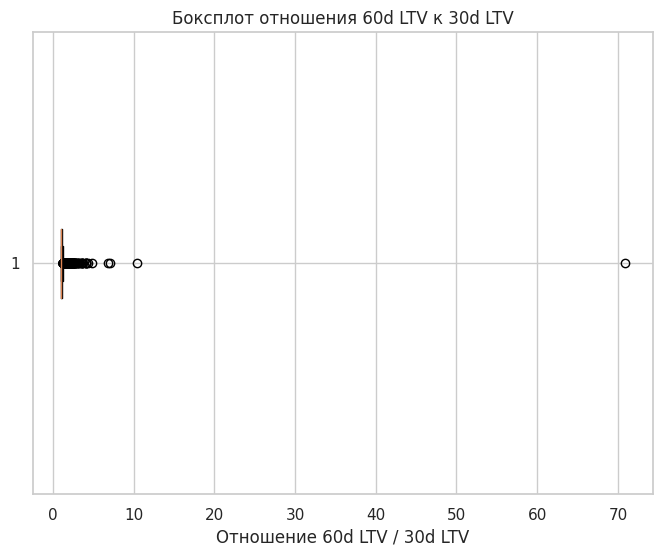

In [88]:
# Построение боксплота
plt.figure(figsize=(8, 6))
plt.boxplot(ratio, vert=False)
plt.title('Боксплот отношения 60d LTV к 30d LTV')
plt.xlabel('Отношение 60d LTV / 30d LTV')

# Отображение графика
plt.show()

70 - явный выброс, посмотрим на то, обосновывается ли он данными ранее

In [89]:
ratio.sort_values()

,0
4900,1.000000
2346,1.000000
718,1.000000
9518,1.000000
3666,1.000000
...,...
7817,4.897240
7177,6.835538
6792,7.017248
5407,10.425939


In [92]:
merged_data_positive_60ltv.loc[[4900, 2346, 5407, 8336]]

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60,LTV_Group
4900,2020-04-08,160483,KR,13.0,7.94,3.377168,3.388003,4.007655,4.972800,8.052114,8.052114,1.014120,60d_LTV > 0
2346,2020-03-18,90619,AT,4.0,4.19,0.307731,0.505845,0.799200,1.502938,2.056306,2.056306,0.490765,60d_LTV > 0
5407,2020-04-12,789050,NZ,15.0,3.21,1.878993,2.023161,2.772060,3.973715,5.036962,52.515059,16.359831,60d_LTV > 0
8336,2020-04-07,94157,QA,2.0,0.24,0.014149,0.014149,0.014149,0.014149,0.014149,1.002224,4.175933,60d_LTV > 0


In [98]:
sum((ratio - 1.0) < 0.0000001)

1404

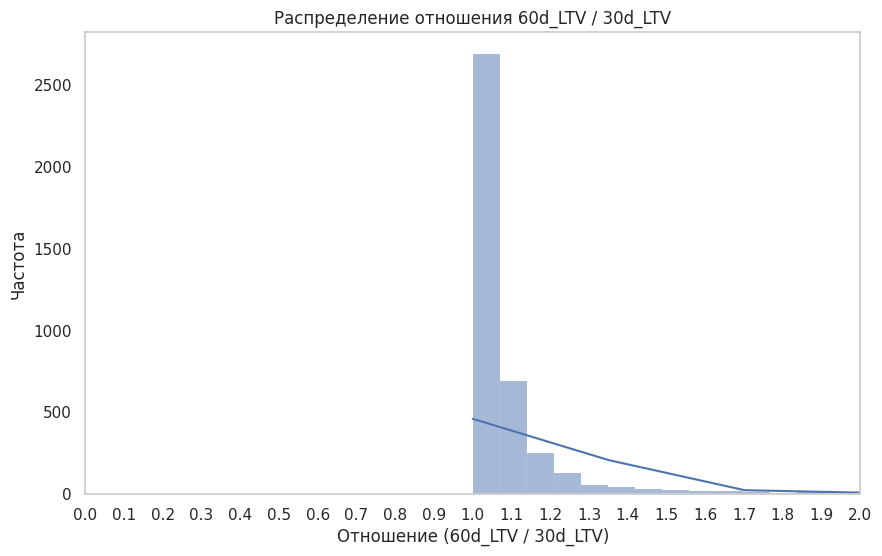

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(ratio.dropna(), bins=1000, kde=True)  # Используем kde=True для линии плотности
plt.title('Распределение отношения 60d_LTV / 30d_LTV')
plt.xlabel('Отношение (60d_LTV / 30d_LTV)')
plt.ylabel('Частота')
plt.xlim(0, 2)
plt.xticks(np.arange(0, 2.1, 0.1))
plt.grid()
plt.show()

Примерно 35% данных имеют точно ту же цифру 60d_LTV, что и 30d_LTV

---



In [126]:
sum((ratio - 1.0) < 0.1)

3051

И 76% имеют прирост от 0 до 10%

Посмотрю соотношение 60 и 14 LTV

In [119]:
filtered_data2 = merged_data[(merged_data['60d_LTV']>0)&(merged_data['14d_LTV']>0)]

ratio2=(filtered_data2['60d_LTV']/filtered_data2['14d_LTV']).dropna()
ratio2.describe()

,0
count,4023.000000
mean,1.323745
std,1.333690
min,1.000000
25%,1.005928
50%,1.144970
75%,1.342621
max,70.833555


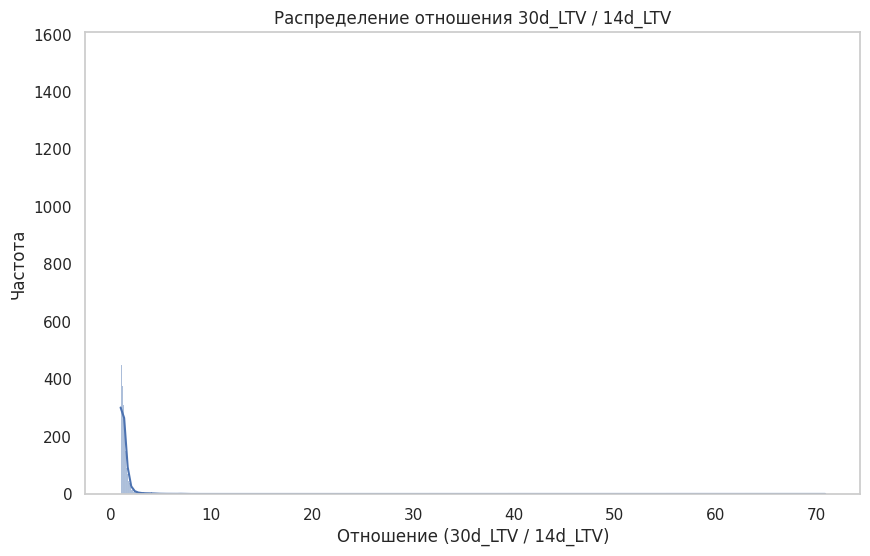

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(ratio2.dropna(), bins=1000, kde=True)  # Используем kde=True для линии плотности
plt.title('Распределение отношения 30d_LTV / 14d_LTV')
plt.xlabel('Отношение (30d_LTV / 14d_LTV)')
plt.ylabel('Частота')
# plt.xlim(0, 100)
plt.grid()
plt.show()

In [121]:
# Рассчитываем корреляцию между 30d_LTV и 60d_LTV
merged_data_positive_60ltv = merged_data[merged_data['60d_LTV']>=0]
correlation = merged_data_positive_60ltv['14d_LTV'].corr(merged_data_positive_60ltv['60d_LTV'])

# Выводим результат
print(f"Корреляция между 30d_LTV и 60d_LTV: {correlation}")

Корреляция между 30d_LTV и 60d_LTV: 0.9921689080157035


## Модель для предсказания 60LTV

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [170]:
X = merged_data_positive_60ltv[['30d_LTV']]
y = merged_data_positive_60ltv['60d_LTV']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [182]:
# Создание модели линейной регрессии
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_valid)

In [172]:
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
mpe = mean_absolute_percentage_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"MPE: {mpe}")
print(f"R²: {r2}")

MSE: 14.48012744294589
MAE: 1.3241171252348036
MPE: 68101716806684.06
R²: 0.9975157651882047


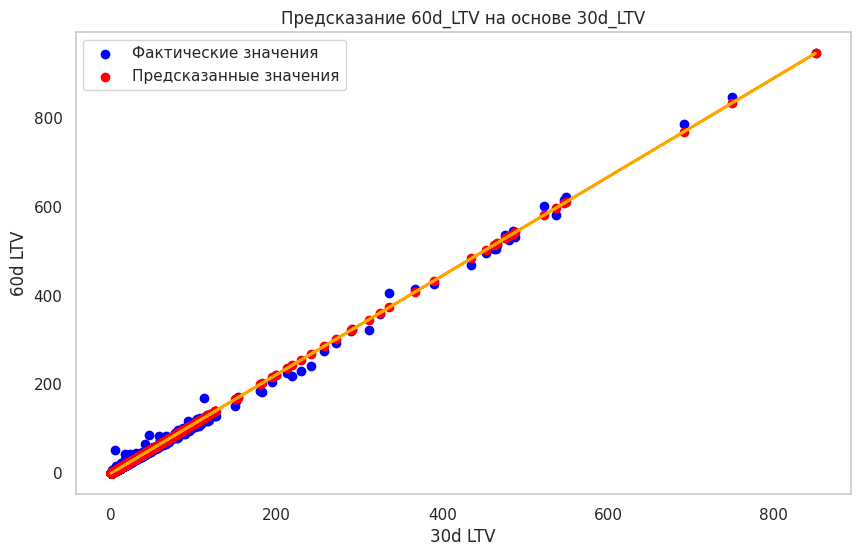

In [175]:
# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(X_valid, y_valid, color='blue', label='Фактические значения')
plt.scatter(X_valid, y_pred, color='red', label='Предсказанные значения')
plt.plot(X_valid, y_pred, color='orange', linewidth=2)
plt.title('Предсказание 60d_LTV на основе 30d_LTV')
plt.xlabel('30d LTV')
plt.ylabel('60d LTV')
plt.legend()
plt.grid()
plt.show()


---
---
Чуть изменю модель



Сперва проверю отличается ли значение у 30 и 60 дней, если все значения до 30го включительно были равны

In [151]:
equal_count1 = ((merged_data_positive_60ltv['1d_LTV'] == merged_data_positive_60ltv['3d_LTV']) &
                (merged_data_positive_60ltv['1d_LTV'] == merged_data_positive_60ltv['7d_LTV']) &
                (merged_data_positive_60ltv['1d_LTV'] == merged_data_positive_60ltv['14d_LTV']) &
                (merged_data_positive_60ltv['1d_LTV'] == merged_data_positive_60ltv['30d_LTV']))
equal_count1.sum()

552

In [154]:
equal_count2 = (equal_count1 &
                (merged_data_positive_60ltv['1d_LTV'] == merged_data_positive_60ltv['60d_LTV']))

equal_count2.sum()

543

Да, есть немного таких значений, у которых 60й день будет отличаться

In [155]:
merged_data_positive_60ltv[equal_count1 &  (merged_data_positive_60ltv['1d_LTV'] != merged_data_positive_60ltv['60d_LTV'])]

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60,LTV_Group
97,2020-03-18,91502,FI,2.0,0.71,0.0,0.0,0.0,0.0,0.0,0.016539,0.023294,60d_LTV > 0
338,2020-04-14,786565,AU,1.0,0.40,0.0,0.0,0.0,0.0,0.0,0.048223,0.120558,60d_LTV > 0
738,2020-03-26,19115,CH,1.0,0.58,0.0,0.0,0.0,0.0,0.0,0.095956,0.165441,60d_LTV > 0
4596,2020-04-04,790667,TH,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.012035,1.203500,60d_LTV > 0
4800,2020-03-22,90430,CH,2.0,0.18,0.0,0.0,0.0,0.0,0.0,0.011597,0.064428,60d_LTV > 0
5783,2020-04-05,803472,US,3.0,1.50,0.0,0.0,0.0,0.0,0.0,0.096175,0.064117,60d_LTV > 0
7766,2020-04-03,90619,DK,2.0,0.84,0.0,0.0,0.0,0.0,0.0,0.695888,0.828438,60d_LTV > 0
8507,2020-04-06,98067,RU,1.0,0.20,0.0,0.0,0.0,0.0,0.0,0.008732,0.043660,60d_LTV > 0
9314,2020-04-17,788408,IT,1.0,0.09,0.0,0.0,0.0,0.0,0.0,0.000030,0.000333,60d_LTV > 0


Так как таких случаев не много, в целом при равенстве всех LTV до 60го мы можем поставить 60ый = 30му дню. Удалим эти данные из модели, так как будем их заполнять сами

In [159]:
merged_data_positive_60ltv.shape

(4578, 13)

In [160]:
data_for_model = merged_data_positive_60ltv[merged_data_positive_60ltv['1d_LTV']!=merged_data_positive_60ltv['30d_LTV']]
data_for_model.shape

(3542, 13)

Лучше и точнее будет предсказывать по 30му дню, это и логично, так как мы к этому моменту имеем больше данных. Так как зависимость линейная, использую линейную регрессию

In [178]:
X = data_for_model[['30d_LTV']]
y = data_for_model['60d_LTV']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [179]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_valid)

In [180]:
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
mpe = mean_absolute_percentage_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"MPE: {mpe}")
print(f"R²: {r2}")

MSE: 52.058370995441514
MAE: 1.7994268474431674
MPE: 0.34898897771342896
R²: 0.9865473658545731


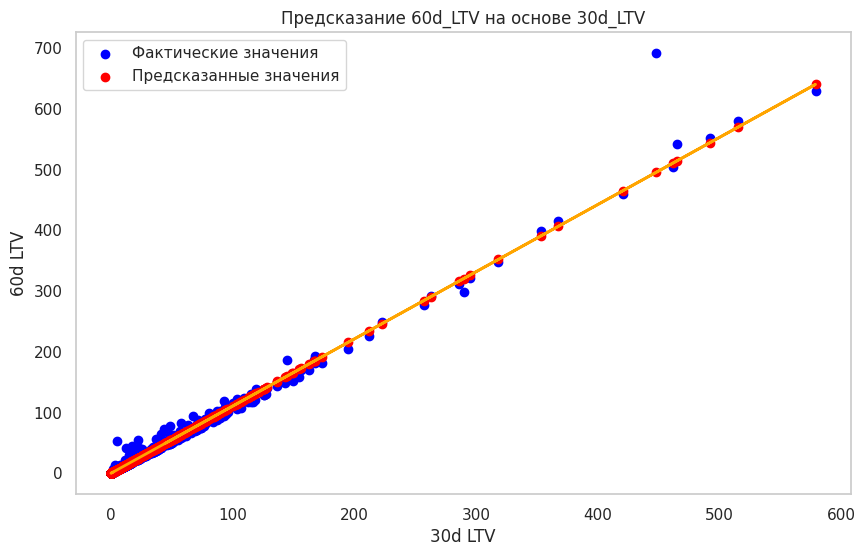

In [183]:
# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(X_valid, y_valid, color='blue', label='Фактические значения')
plt.scatter(X_valid, y_pred, color='red', label='Предсказанные значения')
plt.plot(X_valid, y_pred, color='orange', linewidth=2)
plt.title('Предсказание 60d_LTV на основе 30d_LTV')
plt.xlabel('30d LTV')
plt.ylabel('60d LTV')
plt.legend()
plt.grid()
plt.show()


Модели обладают хорошей точностью, что видно и по метрикам, и по графику. Чуть большей точностью обладает модель без предзаполнения. Этой моделью и воспользуюсь

### Теперь предскажу значения для той части, где LTV60=-1

In [184]:
subset = merged_data[merged_data['LTV_Group']=='60d_LTV < 0']

In [185]:
X_test = subset[['30d_LTV']]
y_pred = model.predict(X_test)

In [186]:
subset['60LTV_pred']=y_pred

<ipython-input-186-12bd1ed89404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['60LTV_pred']=y_pred


In [192]:
data_updated_ltv60 = merged_data.merge(
    subset[['Install_Dates', 'campaign_id', 'Country', '60LTV_pred']],
    on=['Install_Dates', 'campaign_id', 'Country'],
    how='left')

data_updated_ltv60.head()

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60,LTV_Group,60LTV_pred
0,2020-04-14,90570,CZ,35.0,19.79,7.721194,8.104811,10.209480,11.845200,15.349594,15.768420,0.796787,60d_LTV > 0,NaN
1,2020-04-28,90619,AT,5.0,4.99,1.032342,1.032342,1.248888,1.501317,1.761729,-1.000000,-0.200401,60d_LTV < 0,1.795026
2,2020-05-10,794235,PK,79.0,0.40,0.212500,0.254620,0.390186,0.519535,0.652006,-1.000000,-2.500000,60d_LTV < 0,0.567430
3,2020-05-07,91872,FR,12.0,9.56,4.661390,4.787784,6.422362,6.596973,6.596973,-1.000000,-0.104603,60d_LTV < 0,7.143864
4,2020-04-03,19115,JP,6.0,3.39,0.833442,0.833442,1.103046,1.167516,1.398647,1.416652,0.417891,60d_LTV > 0,NaN


In [193]:
data_updated_ltv60['60d_LTV'] = data_updated_ltv60['60d_LTV'].where(
    data_updated_ltv60['60d_LTV'] != -1,
    data_updated_ltv60['60LTV_pred'])

data_updated_ltv60.head()

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60,LTV_Group,60LTV_pred
0,2020-04-14,90570,CZ,35.0,19.79,7.721194,8.104811,10.209480,11.845200,15.349594,15.768420,0.796787,60d_LTV > 0,NaN
1,2020-04-28,90619,AT,5.0,4.99,1.032342,1.032342,1.248888,1.501317,1.761729,1.795026,-0.200401,60d_LTV < 0,1.795026
2,2020-05-10,794235,PK,79.0,0.40,0.212500,0.254620,0.390186,0.519535,0.652006,0.567430,-2.500000,60d_LTV < 0,0.567430
3,2020-05-07,91872,FR,12.0,9.56,4.661390,4.787784,6.422362,6.596973,6.596973,7.143864,-0.104603,60d_LTV < 0,7.143864
4,2020-04-03,19115,JP,6.0,3.39,0.833442,0.833442,1.103046,1.167516,1.398647,1.416652,0.417891,60d_LTV > 0,NaN


In [195]:
data_updated_ltv60.drop(columns=['60LTV_pred'], inplace=True)

Это решение оптимально, так как позволяет сохранить большую часть данных заполняя их с высокой точностью

## delete Проанализирую можно ли эту группу выделить из остальных

Описательные статистики для 60d_LTV = 30d_LTV:
         campaign_id     installs       spends       1d_LTV       3d_LTV  \
count    1356.000000  1356.000000  1356.000000  1356.000000  1356.000000   
mean   292109.179941     5.585546     2.561493     1.311207     1.437169   
std    324452.272721     6.653195     7.443162     7.495020     7.747896   
min     19115.000000     1.000000     0.004200     0.000000     0.000000   
25%     90262.000000     2.000000     0.220000     0.053354     0.055196   
50%     96175.000000     3.000000     0.680000     0.225158     0.240750   
75%    787456.000000     7.000000     2.152500     0.787530     0.847691   
max    803472.000000    67.000000   170.940000   229.223945   229.223938   

            7d_LTV      14d_LTV      30d_LTV      60d_LTV      ROAS_60  
count  1356.000000  1356.000000  1356.000000  1356.000000  1356.000000  
mean      1.734037     1.953642     2.083214     2.083214     1.638135  
std       8.623242     9.598818     9.886723     

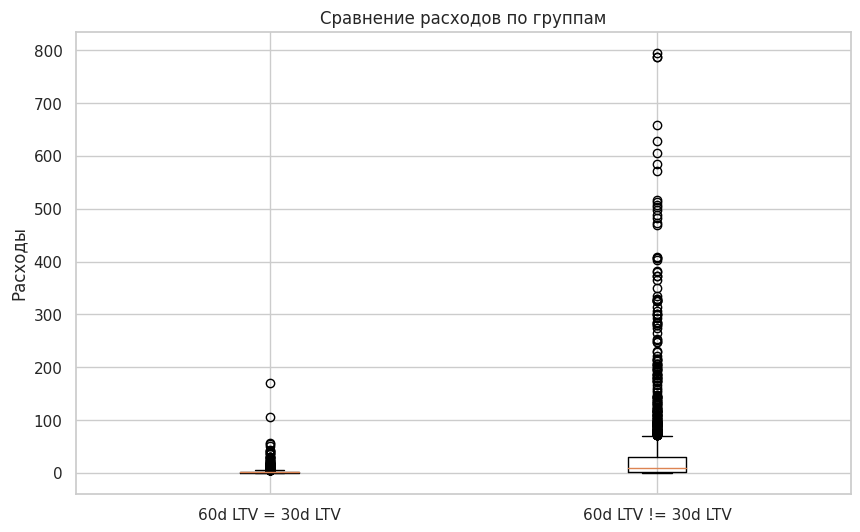

In [101]:
equal_ltv = merged_data_positive_60ltv[(merged_data_positive_60ltv['60d_LTV'] - merged_data_positive_60ltv['30d_LTV'])<0.0000001]
not_equal_ltv = merged_data_positive_60ltv.drop(equal_ltv.index)

# Описательные статистики
equal_stats = equal_ltv.describe()
not_equal_stats = not_equal_ltv.describe()

print("Описательные статистики для 60d_LTV = 30d_LTV:")
print(equal_stats)

print("\nОписательные статистики для 60d_LTV != 30d_LTV:")
print(not_equal_stats)

# Визуализация (например, боксплот для 'spends')
plt.figure(figsize=(10, 6))
plt.boxplot([equal_ltv['spends'], not_equal_ltv['spends']], labels=['60d LTV = 30d LTV', '60d LTV != 30d LTV'])
plt.title('Сравнение расходов по группам')
plt.ylabel('Расходы')
plt.show()

In [67]:
merged_data_positive_60ltv.loc[10187]

,10187
Install_Dates,2020-04-02
campaign_id,90464
Country,UN
installs,0.0
spends,0.45
1d_LTV,0.0
3d_LTV,0.0
7d_LTV,0.0
14d_LTV,0.0
30d_LTV,0.0


D

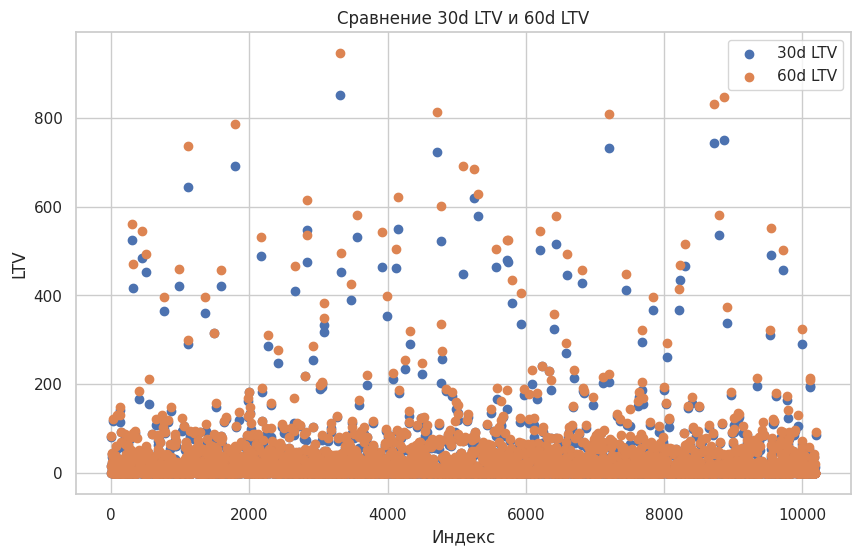

In [58]:
# Построение графика
plt.figure(figsize=(10, 6))

# График для 30d_LTV
plt.scatter(merged_data_positive_60ltv.index, merged_data_positive_60ltv['30d_LTV'], label='30d LTV')

# График для 60d_LTV
plt.scatter(merged_data_positive_60ltv.index, merged_data_positive_60ltv['60d_LTV'], label='60d LTV')

# Настройка графика
plt.title('Сравнение 30d LTV и 60d LTV')
plt.xlabel('Индекс')
plt.ylabel('LTV')
plt.legend()
plt.grid(True)

In [75]:
merged_data

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60,log_spends,sqrt_spends
0,2020-04-14,90570,CZ,35.0,19.79,7.721194,8.104811,10.209480,11.845200,15.349594,15.768420,0.796787,3.034472,4.448595
1,2020-04-28,90619,AT,5.0,4.99,1.032342,1.032342,1.248888,1.501317,1.761729,-1.000000,-0.200401,1.790091,2.233831
2,2020-05-10,794235,PK,79.0,0.40,0.212500,0.254620,0.390186,0.519535,0.652006,-1.000000,-2.500000,0.336472,0.632456
3,2020-05-07,91872,FR,12.0,9.56,4.661390,4.787784,6.422362,6.596973,6.596973,-1.000000,-0.104603,2.357073,3.091925
4,2020-04-03,19115,JP,6.0,3.39,0.833442,0.833442,1.103046,1.167516,1.398647,1.416652,0.417891,1.479329,1.841195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10201,2020-04-02,90464,UN,0.0,0.45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.371564,0.670820
10202,2020-04-27,19115,DE,27.0,21.33,31.003103,36.859179,45.552113,52.804398,58.205993,-1.000000,-0.046882,3.105931,4.618441
10203,2020-03-27,159253,DK,2.0,0.19,0.351962,0.351962,0.386234,0.448579,0.564261,0.693104,3.647916,0.173953,0.435890
10204,2020-04-12,790034,RU,534.0,81.06,47.323662,56.483875,65.396237,75.178386,85.603100,92.690140,1.143476,4.407451,9.003333


## Посмотрю зависимость cost от ROAS 60

Сперва посмотрю как было

In [227]:
merged_data['ROAS_60'] = merged_data['60d_LTV']*merged_data['installs'] / merged_data['spends']

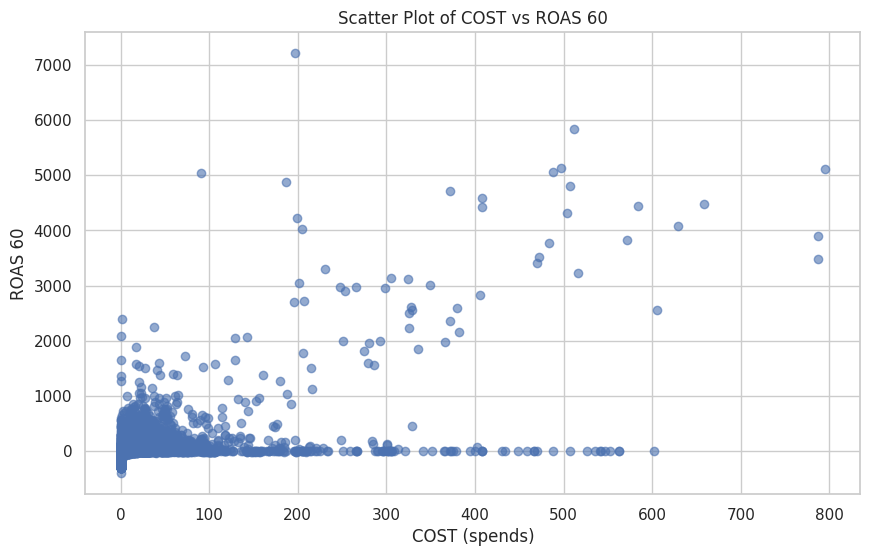

In [228]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['spends'], merged_data['ROAS_60'], color='b', alpha=0.6)

plt.xlabel('COST (spends)')
plt.ylabel('ROAS 60')
plt.title('Scatter Plot of COST vs ROAS 60')

# Show plot
plt.grid(True)
plt.show()

Визуализирую а логарифмической шкале

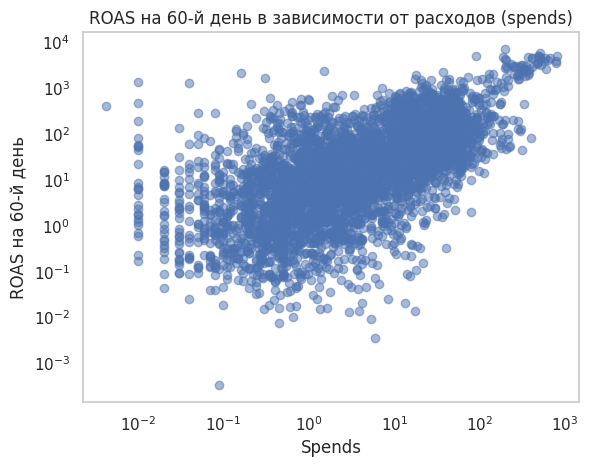

In [229]:
# Визуализация зависимости ROAS от расходов
plt.scatter(merged_data['spends'], merged_data['ROAS_60'], alpha=0.5)
plt.title('ROAS на 60-й день в зависимости от расходов (spends)')
plt.xlabel('Spends')
plt.ylabel('ROAS на 60-й день')
plt.xscale('log')  # Используем логарифмическую шкалу для лучшей визуализации
plt.yscale('log')
plt.grid()
plt.show()

Затем как стало

In [221]:
data_updated_ltv60['ROAS_60'] = data_updated_ltv60['60d_LTV']*data_updated_ltv60['installs']/ data_updated_ltv60['spends']

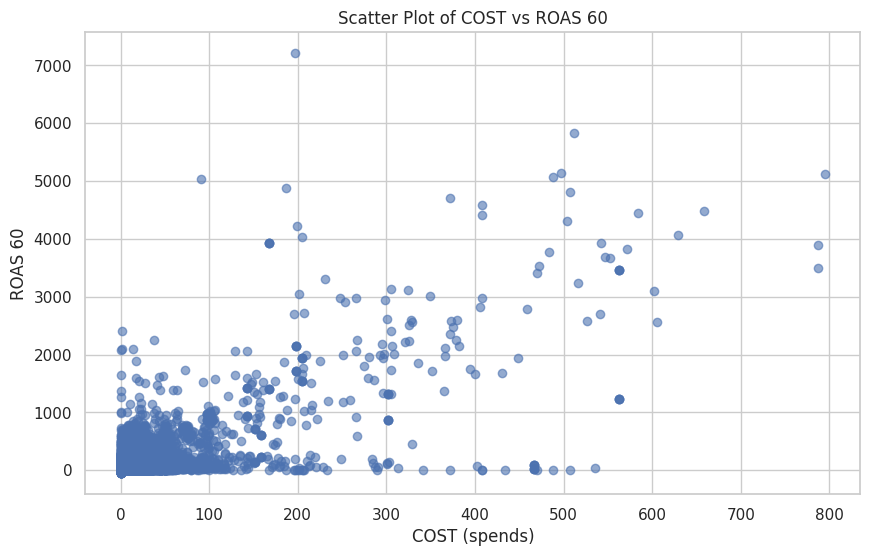

In [222]:
plt.figure(figsize=(10, 6))

plt.scatter(data_updated_ltv60['spends'], data_updated_ltv60['ROAS_60'], color='b', alpha=0.6)

plt.xlabel('COST (spends)')
plt.ylabel('ROAS 60')
plt.title('Scatter Plot of COST vs ROAS 60')

# Show plot
plt.grid(True)
plt.show()

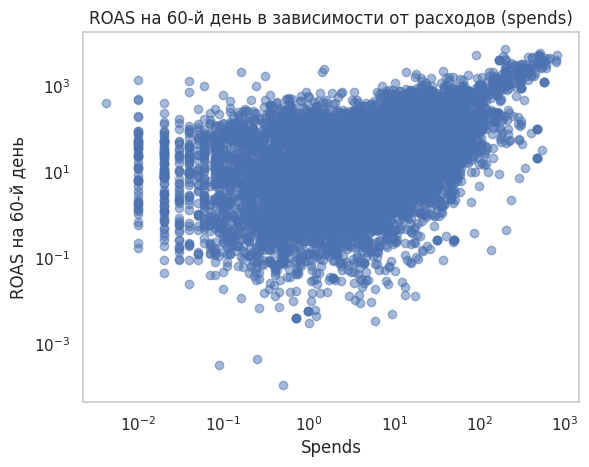

In [223]:
# Визуализация зависимости ROAS от расходов
plt.scatter(data_updated_ltv60['spends'], data_updated_ltv60['ROAS_60'], alpha=0.5)
plt.title('ROAS на 60-й день в зависимости от расходов (spends)')
plt.xlabel('Spends')
plt.ylabel('ROAS на 60-й день')
plt.xscale('log')  # Используем логарифмическую шкалу для лучшей визуализации
plt.yscale('log')
plt.grid()
plt.show()

Попробую посмотреть как будет выгляжеть прибыль, а не ROAS

In [224]:
data_updated_ltv60['revenue_60'] = data_updated_ltv60['60d_LTV'] * data_updated_ltv60['installs']
data_updated_ltv60.head()

,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60,LTV_Group,sqrt_spends,REVENUE_60,optimal_daily_cost,revenue_60
0,2020-04-14,90570,CZ,35.0,19.79,7.721194,8.104811,10.209480,11.845200,15.349594,15.768420,27.887555,60d_LTV > 0,4.448595,551.894708,0.0,551.894708
1,2020-04-28,90619,AT,5.0,4.99,1.032342,1.032342,1.248888,1.501317,1.761729,1.795026,1.798623,60d_LTV < 0,2.233831,8.975130,0.0,8.975130
2,2020-05-10,794235,PK,79.0,0.40,0.212500,0.254620,0.390186,0.519535,0.652006,0.567430,112.067359,60d_LTV < 0,0.632456,44.826943,0.0,44.826943
3,2020-05-07,91872,FR,12.0,9.56,4.661390,4.787784,6.422362,6.596973,6.596973,7.143864,8.967193,60d_LTV < 0,3.091925,85.726363,0.0,85.726363
4,2020-04-03,19115,JP,6.0,3.39,0.833442,0.833442,1.103046,1.167516,1.398647,1.416652,2.507349,60d_LTV > 0,1.841195,8.499912,0.0,8.499912


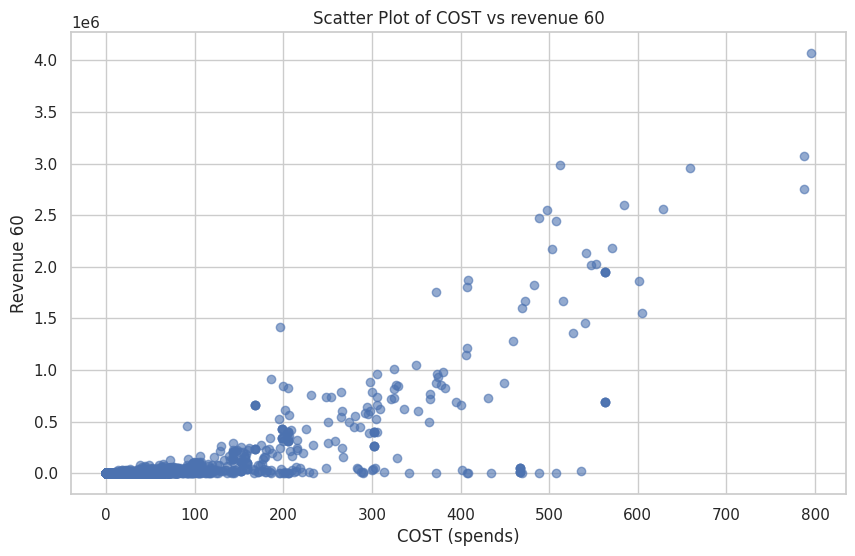

In [226]:
plt.figure(figsize=(10, 6))

plt.scatter(data_updated_ltv60['spends'], data_updated_ltv60['revenue_60'], color='b', alpha=0.6)

plt.xlabel('COST (spends)')
plt.ylabel('Revenue 60')
plt.title('Scatter Plot of COST vs revenue 60')

# Show plot
plt.grid(True)
plt.show()

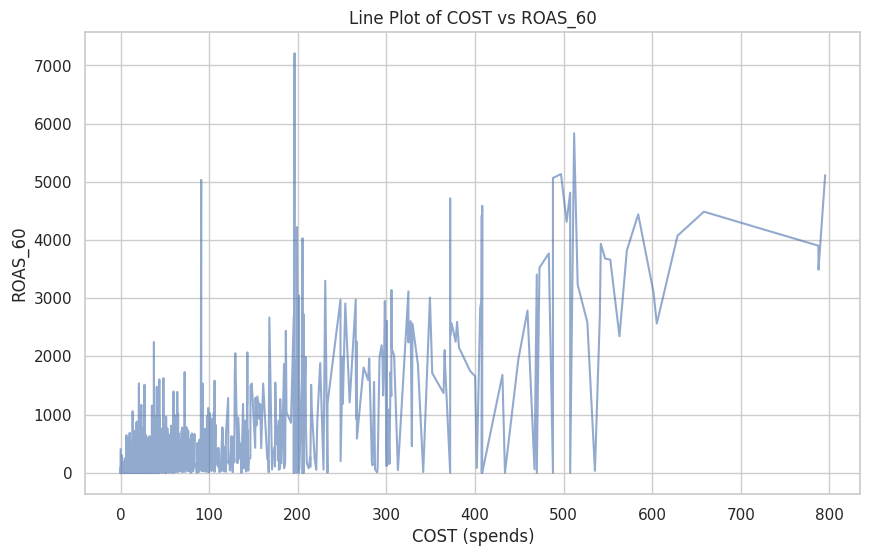

In [275]:
data_grouped = data_updated_ltv60.groupby('spends')['ROAS_60'].mean().reset_index()

# Настраиваем размер графика
plt.figure(figsize=(10, 6))

# Рисуем линии для средних значений
plt.plot(data_grouped['spends'], data_grouped['ROAS_60'], color='b', alpha=0.6)

plt.xlabel('COST (spends)')
plt.ylabel('ROAS_60')
plt.title('Line Plot of COST vs ROAS_60')

# Добавляем сетку
plt.grid(True)

# Показываем график
plt.show()


ыы

---



Посчитаю корреляцию, так как данные нелинейные, применю ранговую корреляцию Спирмана

In [277]:
import pandas as pd
from scipy.stats import spearmanr

# merged_data - таблица с колонками 'spends' и 'ROAS_60'
spearman_corr, p_value = spearmanr(data_updated_ltv60['spends'], data_updated_ltv60['ROAS_60'])

print(f"Спирмановская корреляция: {spearman_corr}, p-значение: {p_value}")


Спирмановская корреляция: 0.656789443583223, p-значение: 0.0


Попробую построить экспоненциальную регрессию

Полиномиальная регрессия

In [281]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = data_updated_ltv60[['spends']]
y = data_updated_ltv60['ROAS_60']

# Полиномиальная регрессия
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Модель
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
print(f"Коэффициенты модели: {model.coef_}")


Коэффициенты модели: [ 0.00000000e+00  2.91218899e+00  2.12565728e-02 -5.72369042e-05
  4.41922792e-08]


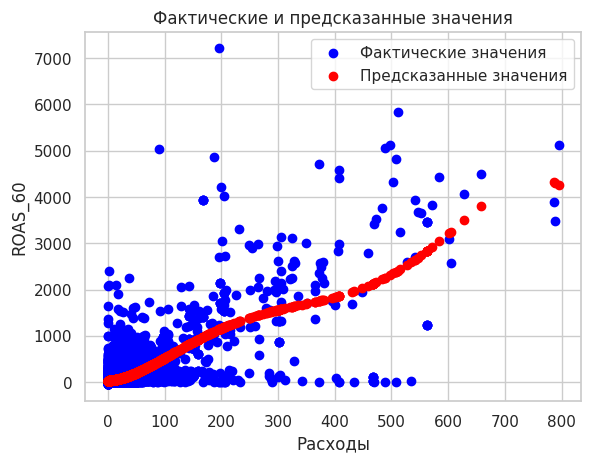

In [280]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Фактические значения')
plt.scatter(X, y_pred, color='red', label='Предсказанные значения')
plt.title('Фактические и предсказанные значения')
plt.xlabel('Расходы')
plt.ylabel('ROAS_60')
plt.legend()
plt.show()


На наших данных мы можем опровергнуть гипотезу, хотя коэффицент при spends^3 указывает на то, что на некотором этапе увеличение расходов будет приводить к замедлению роста ROAS. Однако остальные коэффиценты положительны и общий тренд явно указывает, что пр росте расходов растет и ROAS_60

   interval        mean            var
0         0   -6.715636    2790.657390
1         1   19.429846    8155.059200
2         2   23.279169    6191.275962
3         3   27.624059    5088.130086
4         4   33.957071   12818.155052
5         5   28.394309    4213.724054
6         6   62.173487   18533.757599
7         7  102.912720   34140.674590
8         8  129.559993   33202.266070
9         9  527.570857  799674.468445


<Figure size 1200x600 with 0 Axes>

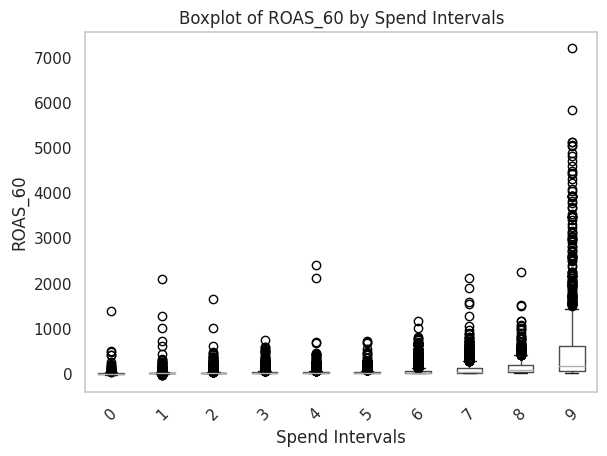

In [282]:
data_sorted = data_updated_ltv60.sort_values('spends')
data_sorted['interval'] = pd.qcut(data_sorted['spends'], 10, labels=False)

summary_stats = data_sorted.groupby('interval')['ROAS_60'].agg(['mean', 'var']).reset_index()

# Печать средних и дисперсий
print(summary_stats)


plt.figure(figsize=(12, 6))
data_sorted.boxplot(column='ROAS_60', by='interval', grid=False)
plt.title('Boxplot of ROAS_60 by Spend Intervals')
plt.suptitle('')
plt.xlabel('Spend Intervals')
plt.ylabel('ROAS_60')
plt.xticks(rotation=45)
plt.show()

## Cуточный рекламный бюджет, который максимизирует абсолютную маркетинговую прибыль рекламной кампании

In [289]:
from scipy.optimize import minimize #оптимизационная функция, которая пытается найти бюджет, при котором прибыль максимальна.

data_updated_ltv60['REVENUE_60'] = data_updated_ltv60['60d_LTV'] * data_updated_ltv60['installs']

# Функция для расчета прибыли
def profit(cost, revenue_60, cost_per_day):
    return -(revenue_60 - cost)  # используем отрицательную прибыль для максимизации


data_updated_ltv60['optimal_daily_cost'] = data_updated_ltv60.apply(find_optimal_cost, axis=1)
data_updated_ltv60


,Install_Dates,campaign_id,Country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV,ROAS_60,LTV_Group,sqrt_spends,REVENUE_60,optimal_daily_cost,revenue_60
0,2020-04-14,90570,CZ,35.0,19.79,7.721194,8.104811,10.209480,11.845200,15.349594,15.768420,27.887555,60d_LTV > 0,4.448595,551.894708,0.0,551.894708
1,2020-04-28,90619,AT,5.0,4.99,1.032342,1.032342,1.248888,1.501317,1.761729,1.795026,1.798623,60d_LTV < 0,2.233831,8.975130,0.0,8.975130
2,2020-05-10,794235,PK,79.0,0.40,0.212500,0.254620,0.390186,0.519535,0.652006,0.567430,112.067359,60d_LTV < 0,0.632456,44.826943,0.0,44.826943
3,2020-05-07,91872,FR,12.0,9.56,4.661390,4.787784,6.422362,6.596973,6.596973,7.143864,8.967193,60d_LTV < 0,3.091925,85.726363,0.0,85.726363
4,2020-04-03,19115,JP,6.0,3.39,0.833442,0.833442,1.103046,1.167516,1.398647,1.416652,2.507349,60d_LTV > 0,1.841195,8.499912,0.0,8.499912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11749,2020-04-02,90464,UN,0.0,0.45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60d_LTV = 0,0.670820,0.000000,0.0,0.000000
11750,2020-04-27,19115,DE,27.0,21.33,31.003103,36.859179,45.552113,52.804398,58.205993,64.234729,81.309783,60d_LTV < 0,4.618441,1734.337673,0.0,1734.337673
11751,2020-03-27,159253,DK,2.0,0.19,0.351962,0.351962,0.386234,0.448579,0.564261,0.693104,7.295832,60d_LTV > 0,0.435890,1.386208,0.0,1.386208
11752,2020-04-12,790034,RU,534.0,81.06,47.323662,56.483875,65.396237,75.178386,85.603100,92.690140,610.616021,60d_LTV > 0,9.003333,49496.534637,0.0,49496.534637


In [325]:
data__ = data_updated_ltv60[['Install_Dates','spends','60d_LTV']]
data__['profit'] = data__['60d_LTV'] - data__['spends']
data__

<ipython-input-325-3d806547aeda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data__['profit'] = data__['60d_LTV'] - data__['spends']


,Install_Dates,spends,60d_LTV,profit
0,2020-04-14,19.79,15.768420,-4.021580
1,2020-04-28,4.99,1.795026,-3.194974
2,2020-05-10,0.40,0.567430,0.167430
3,2020-05-07,9.56,7.143864,-2.416136
4,2020-04-03,3.39,1.416652,-1.973348
...,...,...,...,...
11749,2020-04-02,0.45,0.000000,-0.450000
11750,2020-04-27,21.33,64.234729,42.904729
11751,2020-03-27,0.19,0.693104,0.503104
11752,2020-04-12,81.06,92.690140,11.630140


Text(0.5, 1.0, 'Scatter Plot of COST vs Profit 60')

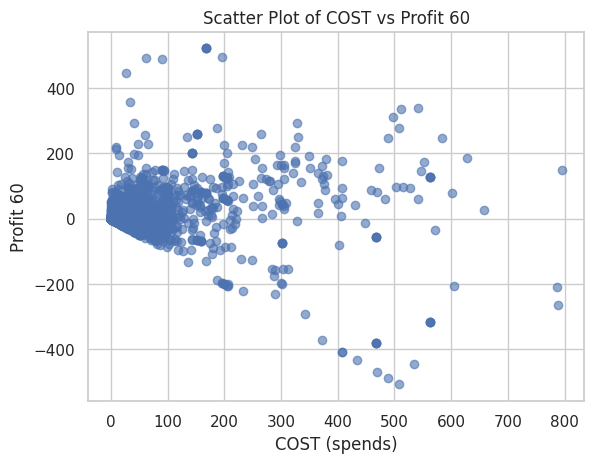

In [326]:
plt.scatter(data__['spends'], data__['profit'], color='b', alpha=0.6)

plt.xlabel('COST (spends)')
plt.ylabel('Profit 60')
plt.title('Scatter Plot of COST vs Profit 60')

## по каждой рекламной кампании дайте ваше заключение

Видимо необходимо

# 5 Связь рекламного траффика и органического
Приток новых игроков делится на 2 основных источника - рекламный и органический. Отдел маркетинг выдвигает гипотезу о связи рекламного и органического траффика: когда маркетологи привлекают больше рекламного траффика, растет и органический.
Для выполнения задачи необходимо использовать тестовый датасет (таблица source_comparison).
Используя Causal Impact Analysis подтвердите или опровергните гипотезу маркетологов. Если вы ее опровергаете, то сформулируйте гипотезу которая кажется вам наиболее вероятной и проверьте ее
Количественно рассчитайте вероятность что гипотеза маркетологов (или ваша) верна


In [346]:
import sqlite3
import pandas as pd

# Открываем соединение с базой данных
db_path = file_path+'/testcase.db'
conn = sqlite3.connect(db_path)

query = """
    SELECT Install_Dates as date,
        SUM(CASE WHEN source_type = 'Organic' THEN installs ELSE 0 END) AS organic_traffic,
        SUM(CASE WHEN source_type = 'Paid' THEN installs ELSE 0 END) AS advertising_traffic
    FROM source_comparison
    GROUP BY Install_Dates
    ORDER BY Install_Dates
    """
data = pd.read_sql_query(query, conn)
data


,date,organic_traffic,advertising_traffic
0,2020-03-18,8961.0,7359.0
1,2020-03-19,8457.0,6739.0
2,2020-03-20,8819.0,7254.0
3,2020-03-21,4485.0,9552.0
4,2020-03-22,5105.0,14804.0
...,...,...,...
56,2020-05-14,3324.0,8761.0
57,2020-05-15,3207.0,7031.0
58,2020-05-16,3732.0,7579.0
59,2020-05-17,3461.0,8513.0


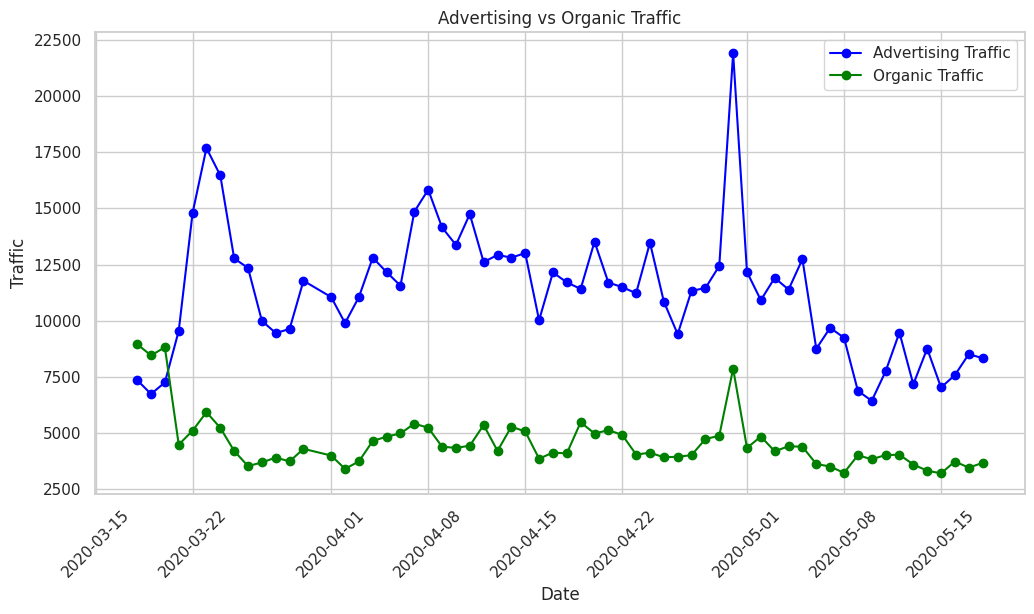

In [347]:
data['date'] = pd.to_datetime(data['date'])

# Создаем график
plt.figure(figsize=(12, 6))

# Рисуем линии
plt.plot(data['date'], data['advertising_traffic'], label='Advertising Traffic', color='blue', marker='o')
plt.plot(data['date'], data['organic_traffic'], label='Organic Traffic', color='green', marker='o')

# Настройки графика
plt.title('Advertising vs Organic Traffic')
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.xticks(rotation=45)
plt.legend()

In [348]:
pip install pycausalimpact

In [349]:
data.set_index('date', inplace=True)

In [350]:
def create_features(df_in, lags=3, target='organic_traffic'):
    tmp = df_in.copy()
    tmp['day'] = tmp.index.day
    tmp['month'] = tmp.index.month

    tmp['rolling_mean_{}'.format(lags)] = tmp[target].rolling(lags, closed='left').mean()
    for lag in range(1, lags+1):
        tmp['lag_{}'.format(lag)] = tmp[target].shift(lag)

    return tmp

train_data = create_features(data).dropna()

In [ ]:
train_data = train_data.drop(columns = 'advertising_traffic')

In [369]:
from causalimpact import CausalImpact

training_start = '2020-03-21'
training_end = '2020-04-27'
treatment_start = '2020-04-28'
treatment_end = '2020-05-15'

In [370]:
impact = CausalImpact(
    train_data,
    pre_period = [training_start, training_end],
    post_period = [treatment_start, treatment_end]
)

/usr/local/lib/python3.10/dist-packages/causalimpact/main.py:603: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/usr/local/lib/python3.10/dist-packages/causalimpact/main.py:302: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_sig = (mu[0], sig[0])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, 

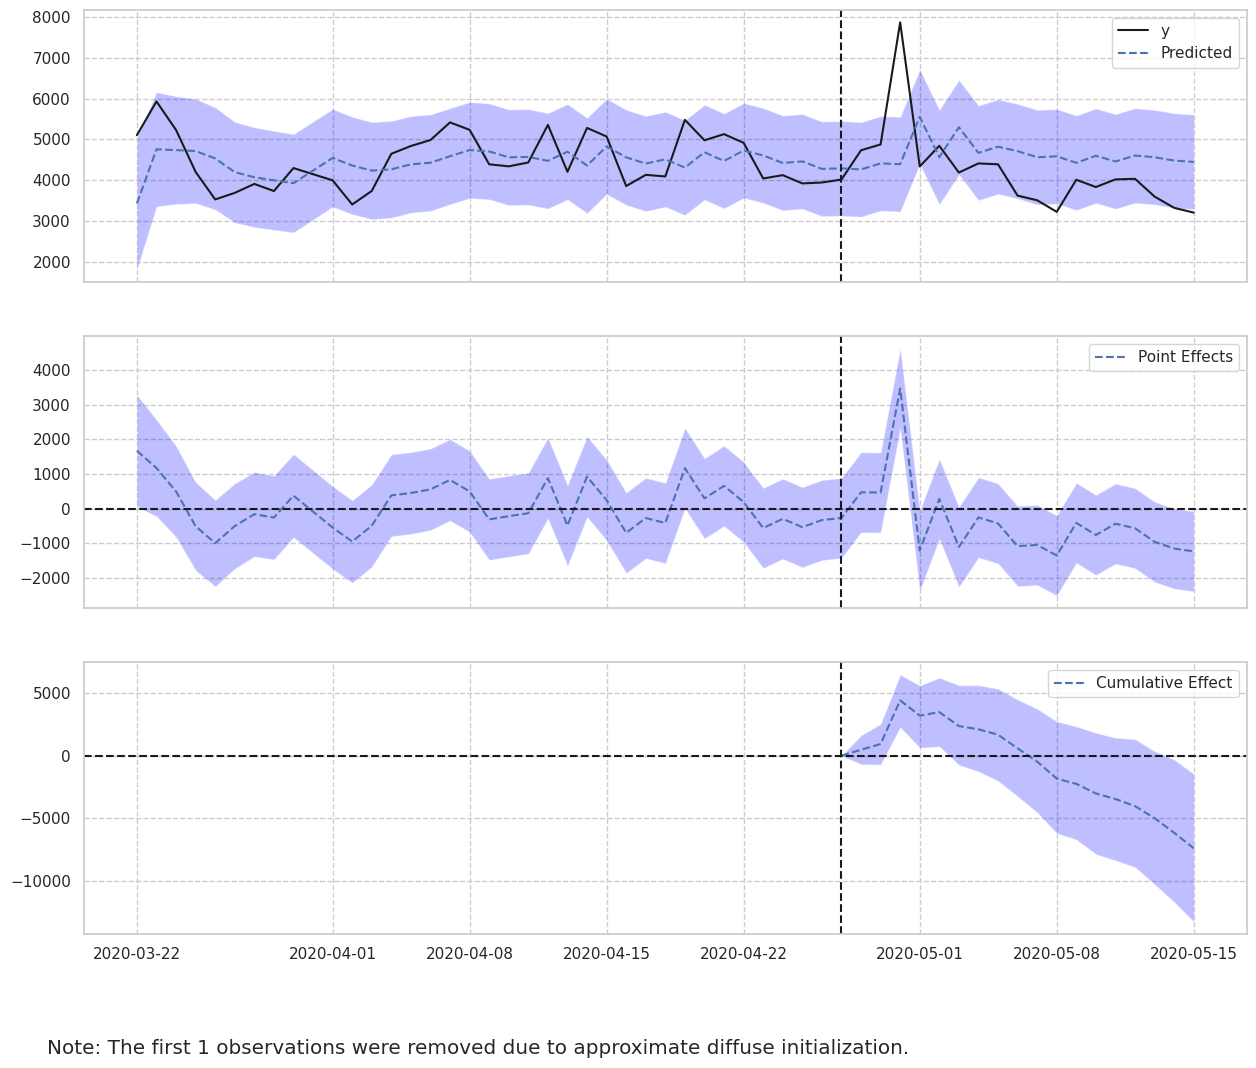

In [371]:
impact.plot()

In [372]:
print(impact.summary())


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    4225.06            76051.0
Prediction (s.d.)         4635.51 (167.01)   83439.25 (3006.11)
95% CI                    [4305.84, 4960.49] [77505.1, 89288.83]

Absolute effect (s.d.)    -410.46 (167.01)   -7388.25 (3006.11)
95% CI                    [-735.44, -80.78]  [-13237.83, -1454.1]

Relative effect (s.d.)    -8.85% (3.6%)      -8.85% (3.6%)
95% CI                    [-15.87%, -1.74%]  [-15.87%, -1.74%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 99.3%

For more details run the command: print(impact.summary('report'))


Таким образом у нас 99.3% вероятность, что изменения являются следствиями события